In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import StratifiedKFold 
import catboost as cb
import matplotlib.pyplot as plt
%matplotlib inline

/home/firehawk/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
TrainDataPath = 'train_jqd04QH.csv'
TestDataPath = 'test_GYi4Gz5.csv'
SubDataPath = 'sample_submission_sxfcbdx.csv'


# Loading the Training and Test Dataset
TrainData = pd.read_csv(TrainDataPath)
TestData = pd.read_csv(TestDataPath)
SubPath = pd.read_csv(SubDataPath)

In [3]:
print("Training Dataset Shape:")
print(TrainData.shape)
print("\n")
print("Training Dataset Columns/Features:")
print(TrainData.dtypes)
TrainData.head()

Training Dataset Shape:
(18359, 14)


Training Dataset Columns/Features:
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [4]:
print("Test Dataset Shape:")
print(TestData.shape)
print("\n")
print("Test Dataset Columns/Features:")
print(TestData.dtypes)
TestData.head()

Test Dataset Shape:
(15021, 13)


Test Dataset Columns/Features:
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [6]:
# Now Checking For Any Missing Values# Now Ch 
print("Training Dataset Missing Value Columns:")
print(TrainData.isnull().sum())
print("\n")
print("Test Dataset Missing Value Columns:")
print(TestData.isnull().sum())

Training Dataset Missing Value Columns:
enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64


Test Dataset Missing Value Columns:
enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64


In [7]:
# checking missing data percentage in train data
total = TrainData.isnull().sum().sort_values(ascending = False)
percent = (TrainData.isnull().sum()/TrainData.isnull().count()*100).sort_values(ascending = False)
missing_TrainData  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_TrainData.head(30)

,Total,Percent
company_type,5039,27.447029
company_size,4779,26.030830
gender,4098,22.321477
major_discipline,2838,15.458358
education_level,457,2.489242
last_new_job,367,1.999020
enrolled_university,342,1.862847
experience,59,0.321368
target,0,0.000000
training_hours,0,0.000000


In [8]:
# checking missing data percentage in test data
total = TestData.isnull().sum().sort_values(ascending = False)
percent = (TestData.isnull().sum()/TestData.isnull().count()*100).sort_values(ascending = False)
missing_TestData  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_TestData.head(30)

,Total,Percent
company_type,4330,28.826310
company_size,4051,26.968910
gender,3388,22.555090
major_discipline,2393,15.931030
education_level,395,2.629652
last_new_job,304,2.023833
enrolled_university,279,1.857400
experience,44,0.292923
training_hours,0,0.000000
relevent_experience,0,0.000000


In [272]:
print(TrainData.enrollee_id.nunique()) ## WE CANNOT USE THIS DATA THIS IS NOT MEANINGFULL NO PATTERN NO USE
print(TestData.enrollee_id.nunique()) 

18359
15021


In [306]:
x = TrainData["enrollee_id"]

In [307]:
x = x.values

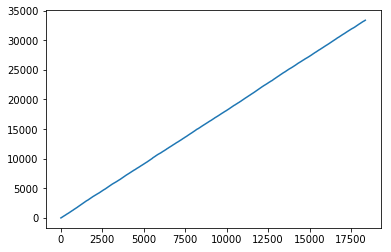

In [311]:
plt.plot(x)

In [9]:
TrainData["city_no"] = TrainData["city"].str[5:].astype(int)
TestData["city_no"] = TestData["city"].str[5:].astype(int)

In [4]:
from IPython.display import HTML, display, clear_output

In [5]:
def train_test_data_check(train_df, test_df, cols=None, use_all_cols=True):
    if cols == None:
        if use_all_cols:
            train_cols = set(train_df.columns)
            test_cols = set(test_df.columns)
            cols = train_cols.intersection(test_cols)
        else:
            train_cols = set(train_df.select_dtypes(['object', 'category']).columns)
            test_cols = set(test_df.select_dtypes(['object', 'category']).columns)
            cols = train_cols.intersection(test_cols)
        
    for i, col in enumerate(cols):
        display(HTML('<h3><font id="'+ col + '-ttdc' + '" color="blue">' + str(i+1) + ') ' + col + '</font></h3>'))
        print("Datatype : " + str(train_df[col].dtype) )
        print(str(train_df[col].dropna().nunique()) + " unique " + col  + " in Train dataset")
        print(str(test_df[col].dropna().nunique()) + " unique " + col  + " in Test dataset")
        extra = len(set(test_df[col].dropna().unique()) - set(train_df[col].dropna().unique()))
        print(str(extra) + " extra " + col + " in Test dataset")
        if extra == 0:
            display(HTML('<h5><font color="green"> All values present in Test dataset also present in Train dataset for column ' + col + '</font></h5>'))
        else:
            display(HTML('<h5><font color="green">' + str(extra) + ' ' +  col + ' are not present in Train dataset which are in Test dataset</font></h5>'))

In [6]:
train_test_data_check(TrainData, TestData)

Datatype : object
3 unique enrolled_university in Train dataset
3 unique enrolled_university in Test dataset
0 extra enrolled_university in Test dataset


Datatype : object
6 unique major_discipline in Train dataset
6 unique major_discipline in Test dataset
0 extra major_discipline in Test dataset


Datatype : object
22 unique experience in Train dataset
22 unique experience in Test dataset
0 extra experience in Test dataset


Datatype : object
2 unique relevent_experience in Train dataset
2 unique relevent_experience in Test dataset
0 extra relevent_experience in Test dataset


Datatype : object
3 unique gender in Train dataset
3 unique gender in Test dataset
0 extra gender in Test dataset


Datatype : object
6 unique last_new_job in Train dataset
6 unique last_new_job in Test dataset
0 extra last_new_job in Test dataset


Datatype : float64
93 unique city_development_index in Train dataset
93 unique city_development_index in Test dataset
0 extra city_development_index in Test dataset


Datatype : int64
123 unique city_no in Train dataset
123 unique city_no in Test dataset
0 extra city_no in Test dataset


Datatype : int64
18359 unique enrollee_id in Train dataset
15021 unique enrollee_id in Test dataset
15021 extra enrollee_id in Test dataset


Datatype : int64
241 unique training_hours in Train dataset
241 unique training_hours in Test dataset
0 extra training_hours in Test dataset


Datatype : object
6 unique company_type in Train dataset
6 unique company_type in Test dataset
0 extra company_type in Test dataset


Datatype : object
123 unique city in Train dataset
123 unique city in Test dataset
0 extra city in Test dataset


Datatype : object
8 unique company_size in Train dataset
8 unique company_size in Test dataset
0 extra company_size in Test dataset


Datatype : object
5 unique education_level in Train dataset
5 unique education_level in Test dataset
0 extra education_level in Test dataset


In [6]:
def plot_bar_counts_categorical(data_se, title, figsize, sort_by_counts=False):
    info = data_se.value_counts()
    info_norm = data_se.value_counts(normalize=True)
    categories = info.index.values
    counts = info.values
    counts_norm = info_norm.values
    fig, ax = plt.subplots(figsize=figsize)
    if data_se.dtype in ['object']:
        if sort_by_counts == False:
            inds = categories.argsort()
            counts = counts[inds]
            counts_norm = counts_norm[inds]
            categories = categories[inds]
        ax = sns.barplot(counts, categories, orient = "h", ax=ax)
        ax.set(xlabel="count", ylabel=data_se.name)
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts):
            ax.text(da, n, str(da)+ ",  " + str(round(counts_norm[n]*100,2)) + " %", fontsize=10, va='center')
    else:
        inds = categories.argsort()
        counts_sorted = counts[inds]
        counts_norm_sorted = counts_norm[inds]
        ax = sns.barplot(categories, counts, orient = "v", ax=ax)
        ax.set(xlabel=data_se.name, ylabel='count')
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts_sorted):
            ax.text(n, da, str(da)+ ",  " + str(round(counts_norm_sorted[n]*100,2)) + " %", fontsize=10, ha='center')

In [7]:
def count_plot_by_hue(data_se, hue_se, title, figsize, sort_by_counts=False):
    if sort_by_counts == False:
        order = data_se.unique()
        order.sort()
    else:
        order = data_se.value_counts().index.values
    off_hue = hue_se.nunique()
    off = len(order)
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.countplot(y=data_se, hue=hue_se, order=order, ax=ax)
    ax.set_title(title)
    patches = ax.patches
    for i, p in enumerate(ax.patches):
        x=p.get_bbox().get_points()[1,0]
        y=p.get_bbox().get_points()[:,1]
        total = x
        p = i
        q = i
        while(q < (off_hue*off)):
            p = p - off
            if p >= 0:
                total = total + (patches[p].get_bbox().get_points()[1,0] if not np.isnan(patches[p].get_bbox().get_points()[1,0]) else 0)
            else:
                q = q + off
                if q < (off*off_hue):
                    total = total + (patches[q].get_bbox().get_points()[1,0] if not np.isnan(patches[q].get_bbox().get_points()[1,0]) else 0)
       
        perc = str(round(100*(x/total), 2)) + " %"
        
        if not np.isnan(x):
            ax.text(x, y.mean(), str(int(x)) + ",  " + perc, va='center')
    plt.show()

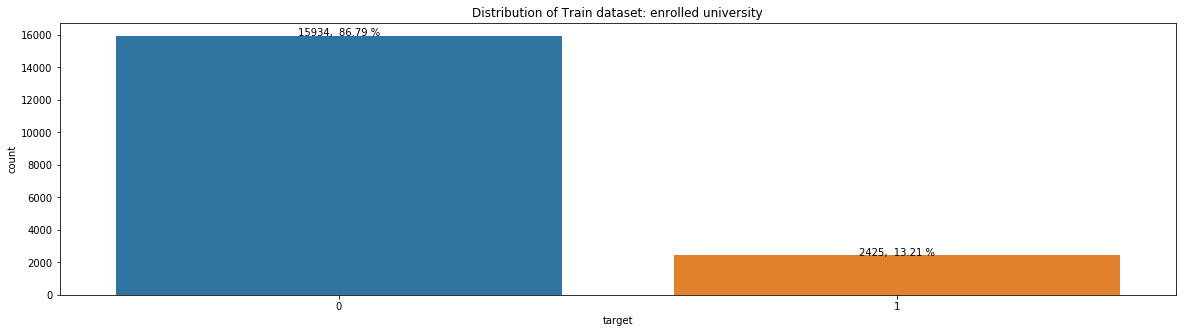

In [8]:
plot_bar_counts_categorical(TrainData['target'], 'Train dataset: enrolled university', (20,5))

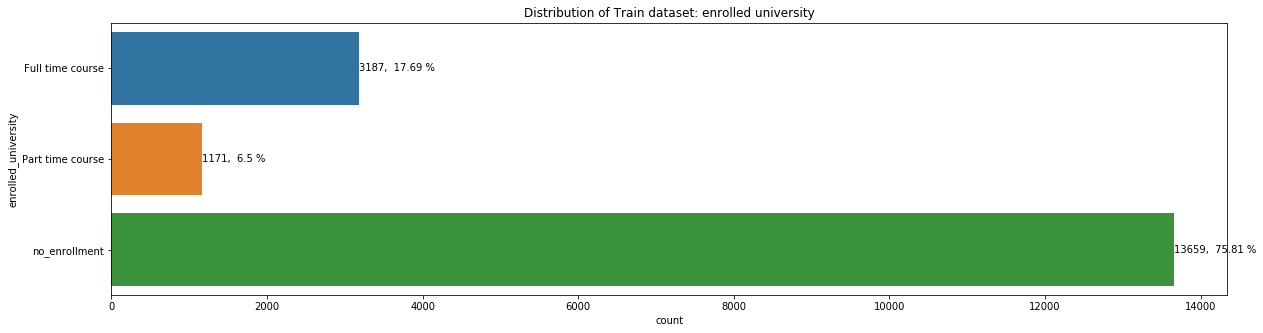

In [9]:
plot_bar_counts_categorical(TrainData['enrolled_university'], 'Train dataset: enrolled university', (20,5))

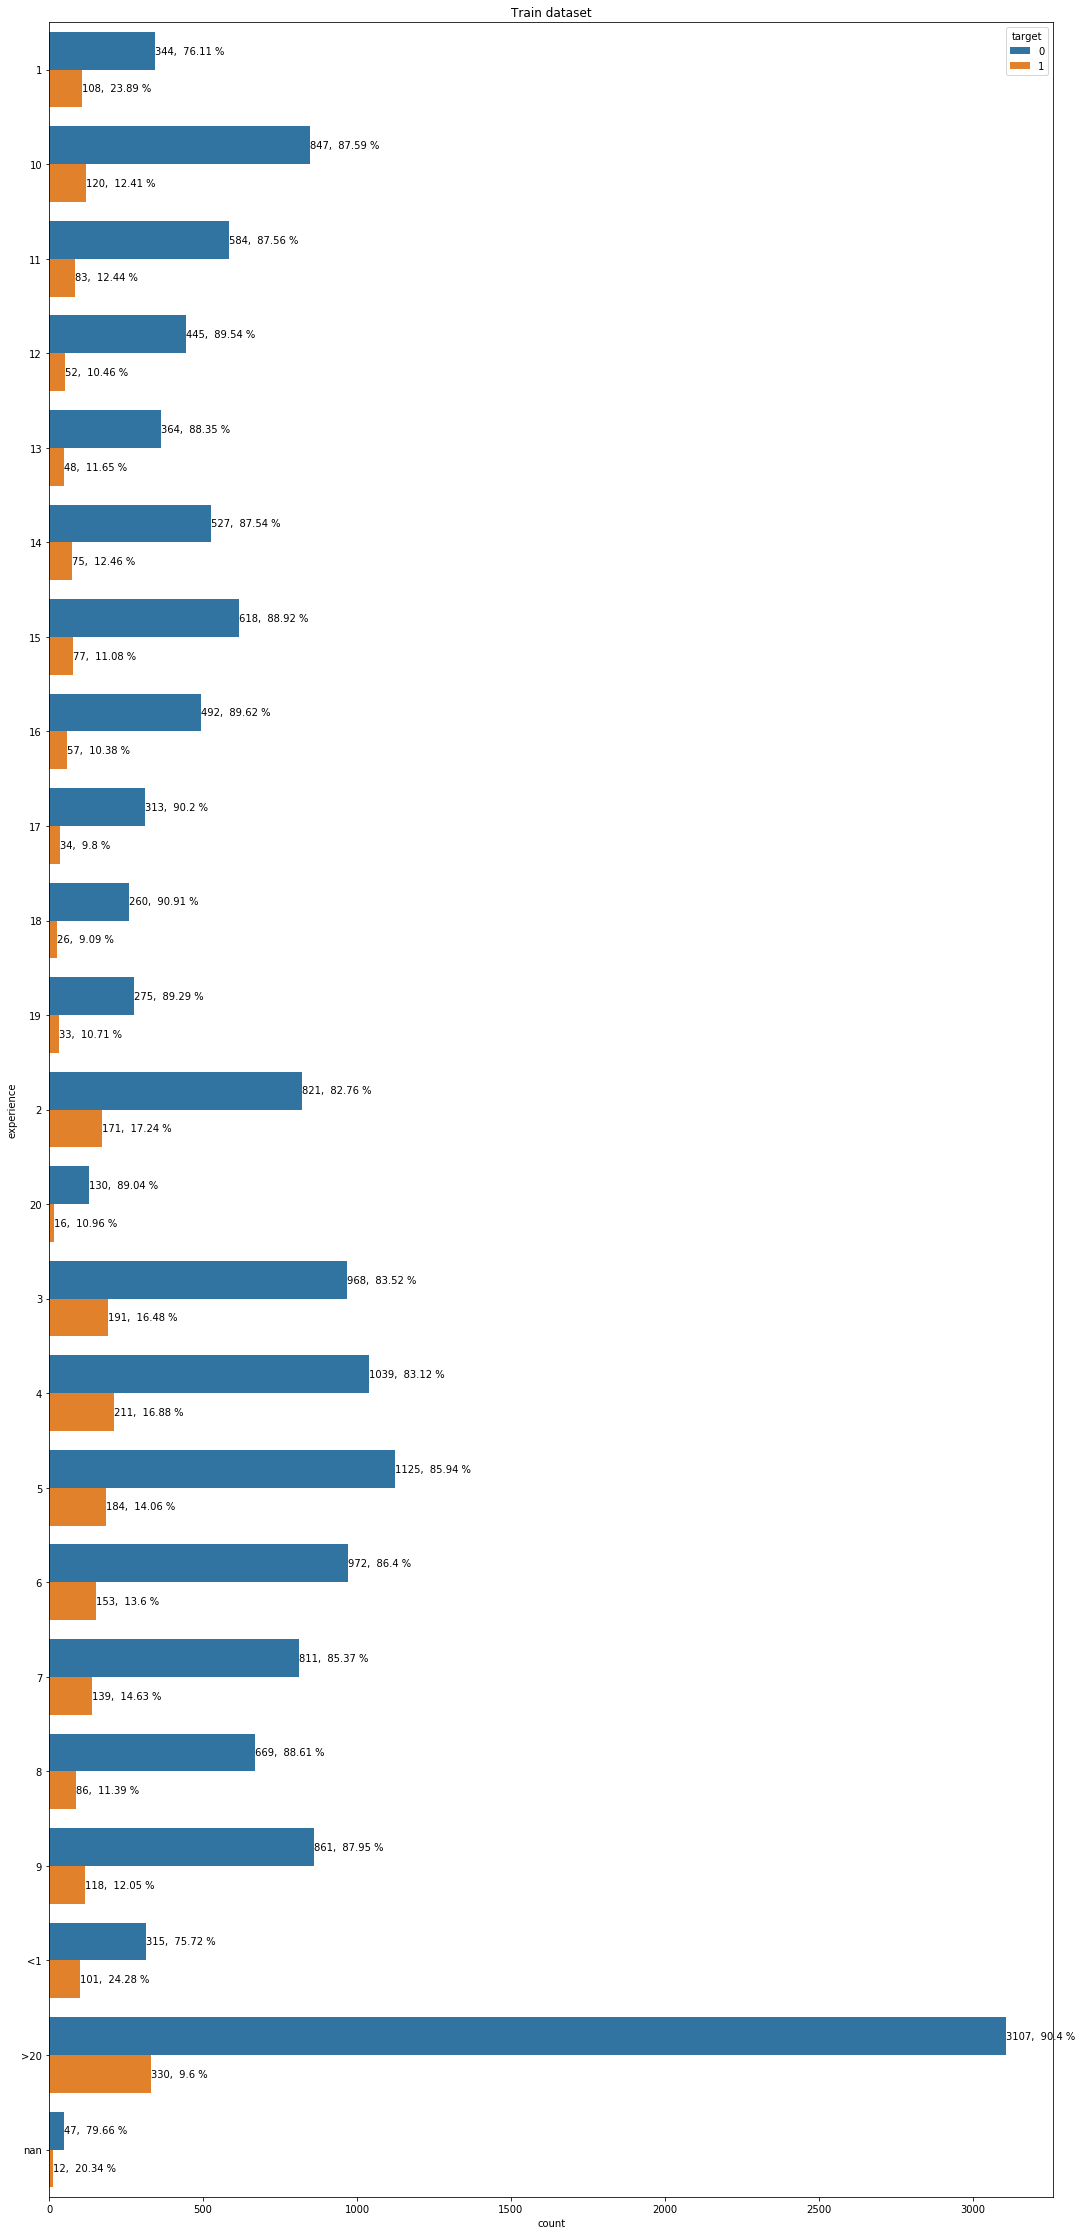

In [28]:
count_plot_by_hue(TrainData['experience'].astype(str), TrainData['target'].astype(str), 'Train dataset', (18,40))

In [29]:
train["experience"].fillna(0, inplace=True)
test["experience"].fillna(0, inplace=True)

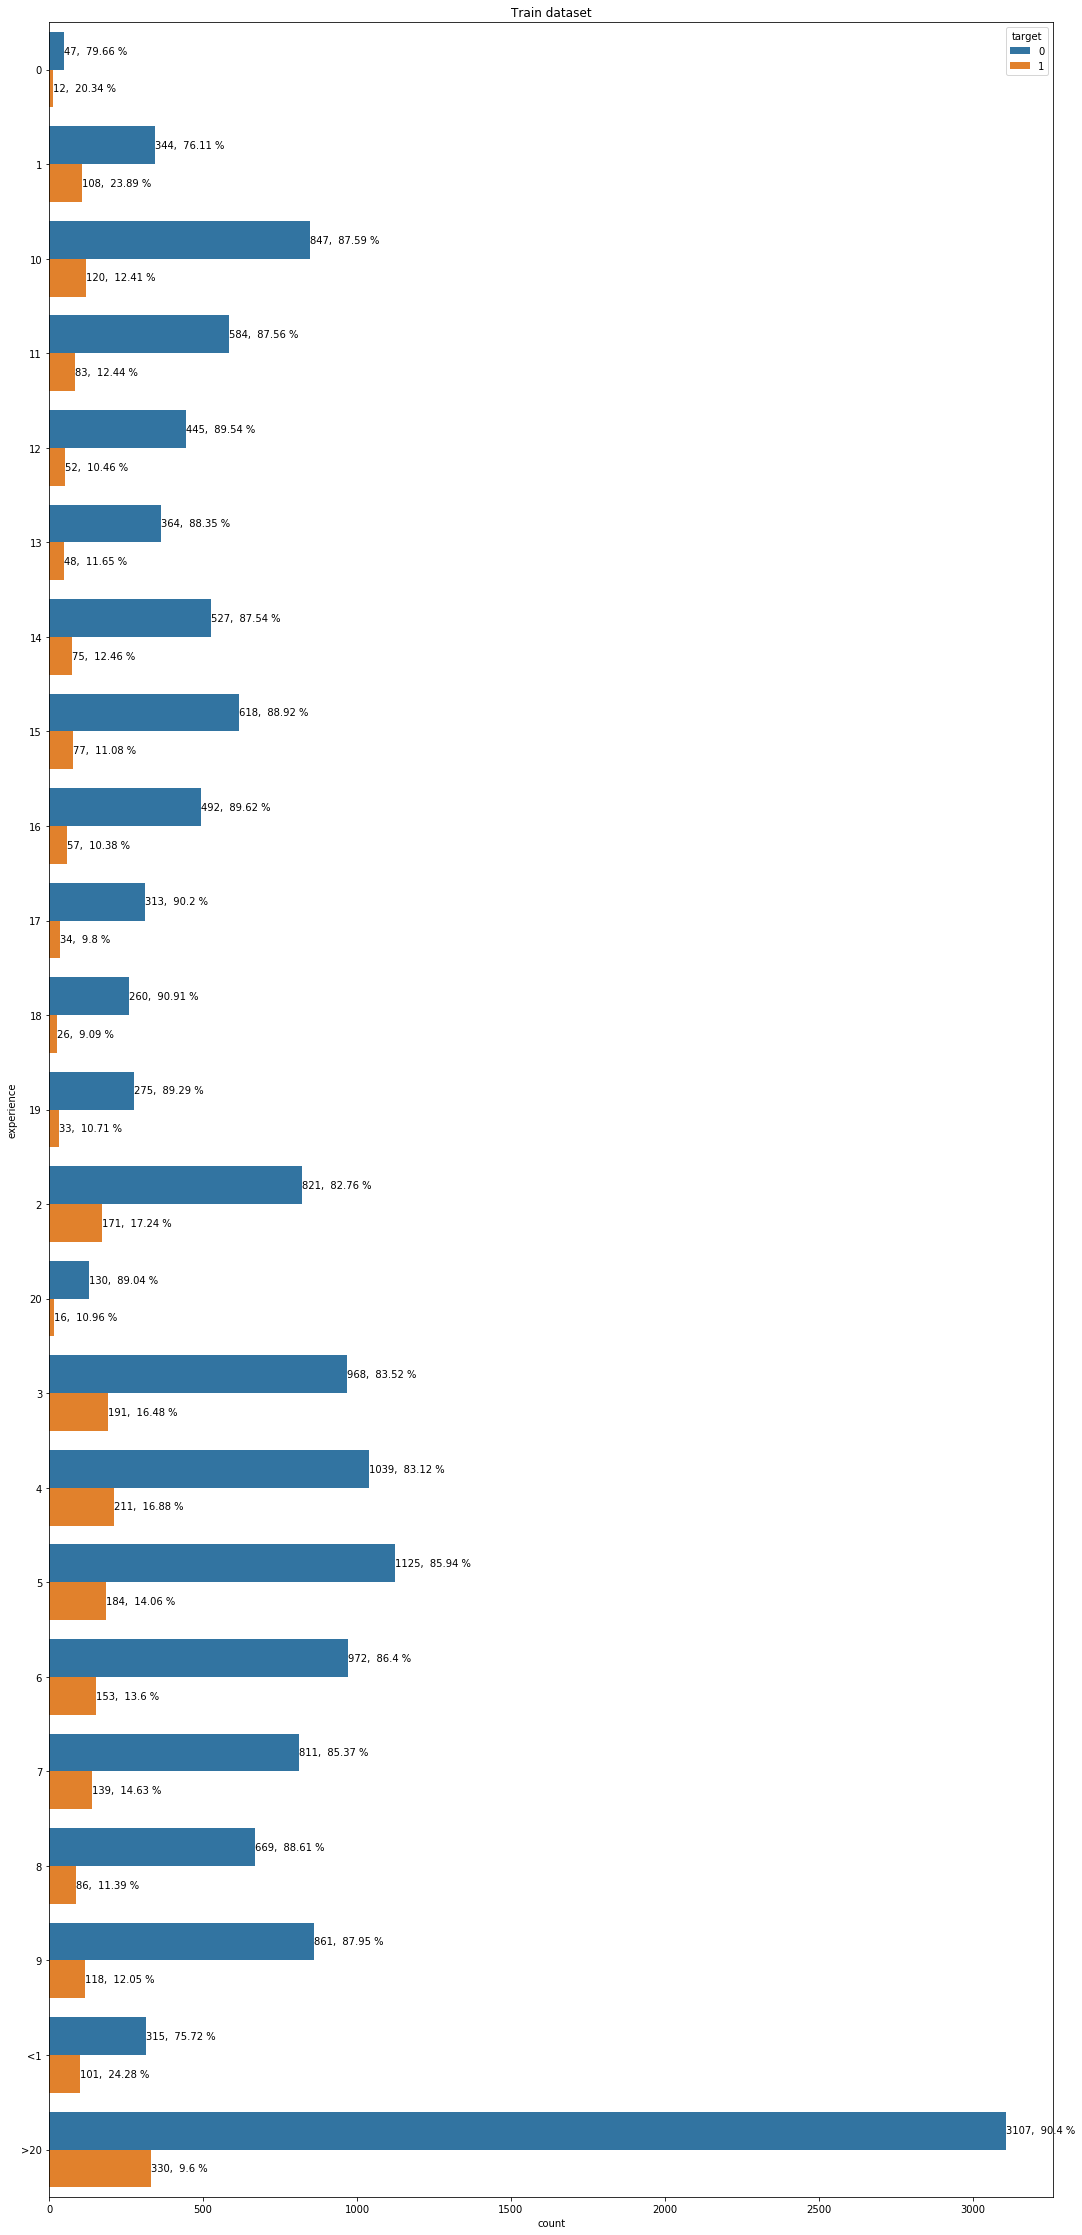

In [31]:
count_plot_by_hue(train['experience'].astype(str), TrainData['target'].astype(str), 'Train dataset', (18,40))

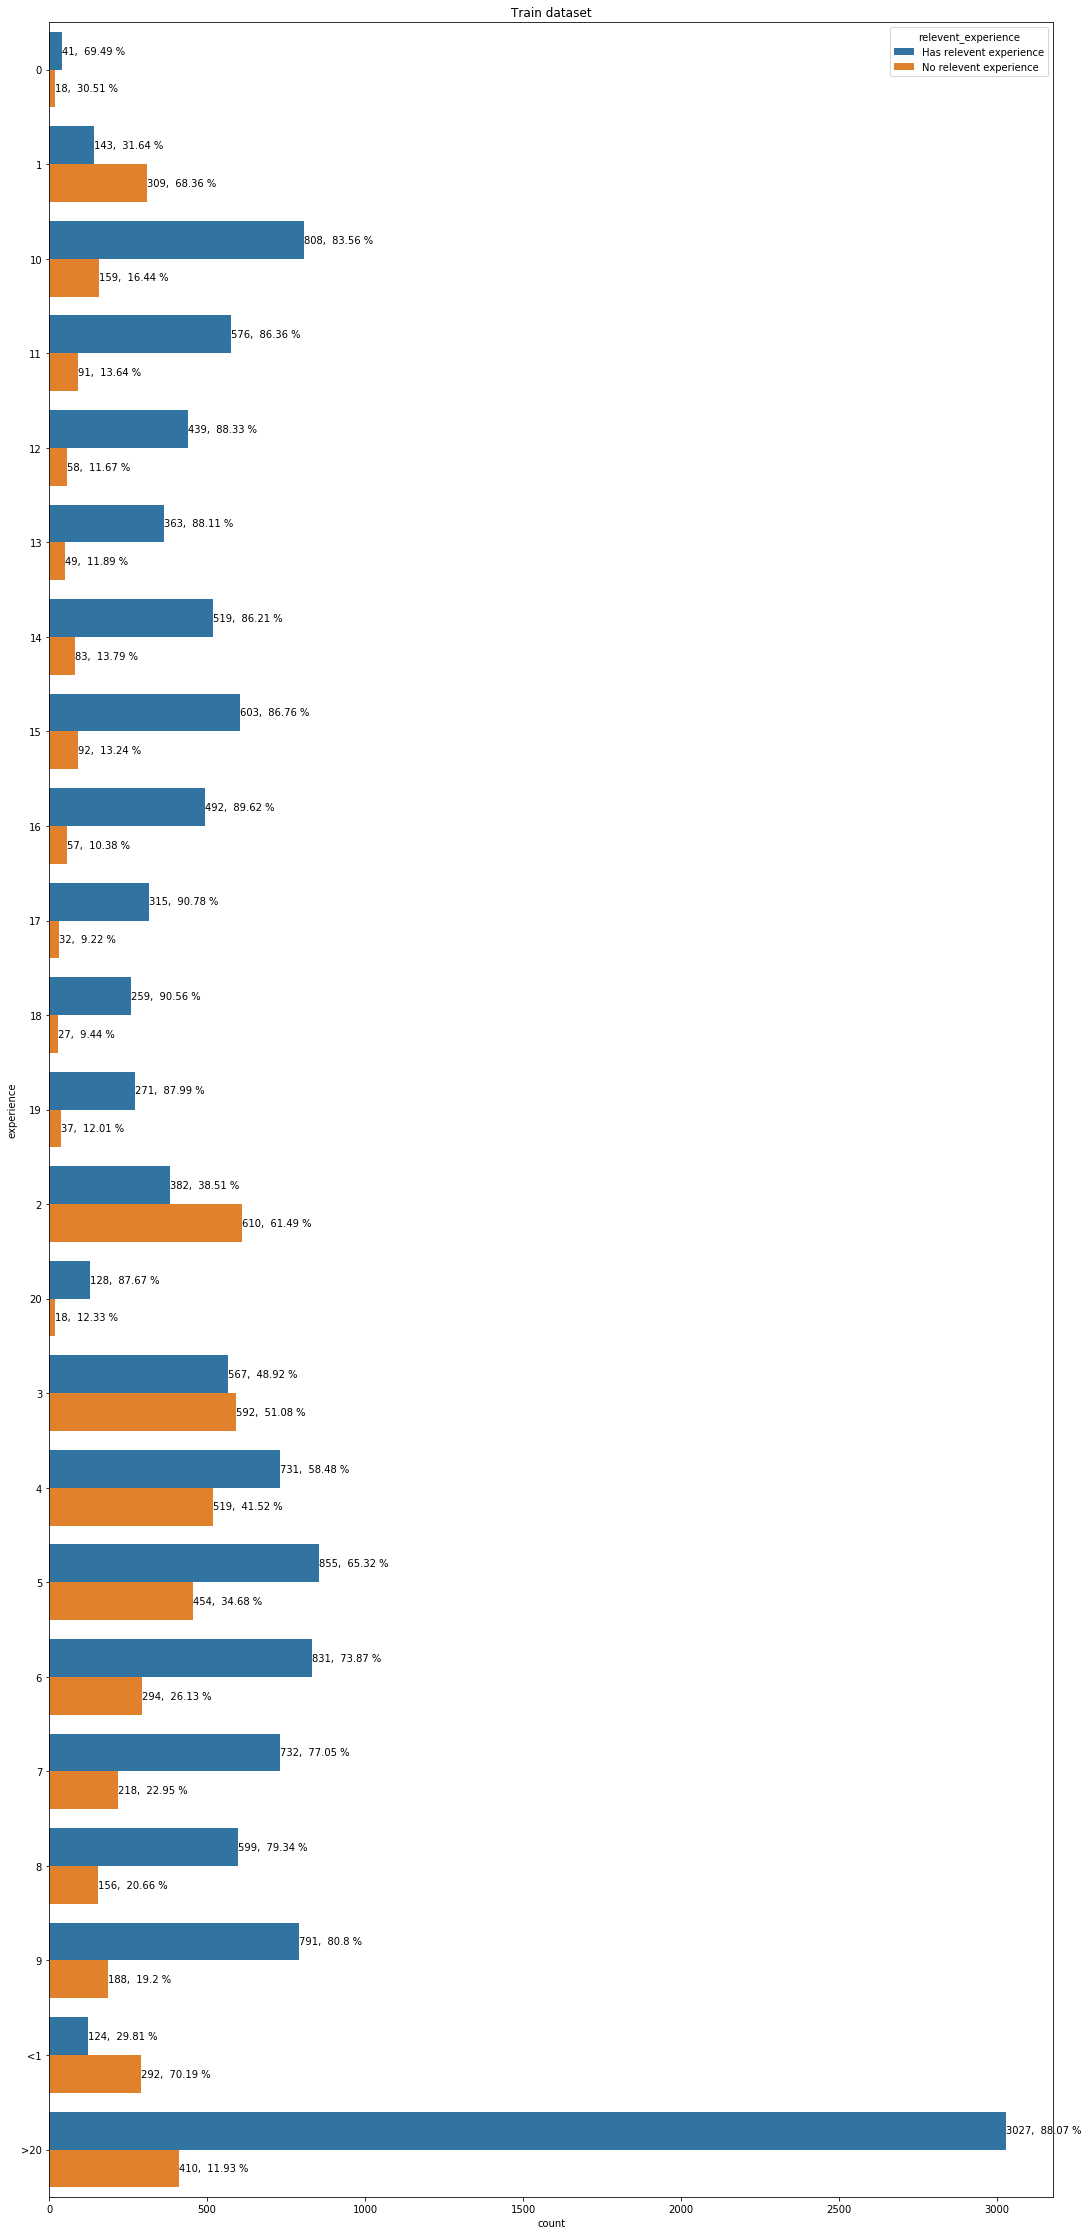

In [32]:
count_plot_by_hue(train['experience'].astype(str), TrainData['relevent_experience'].astype(str), 'Train dataset', (18,40))

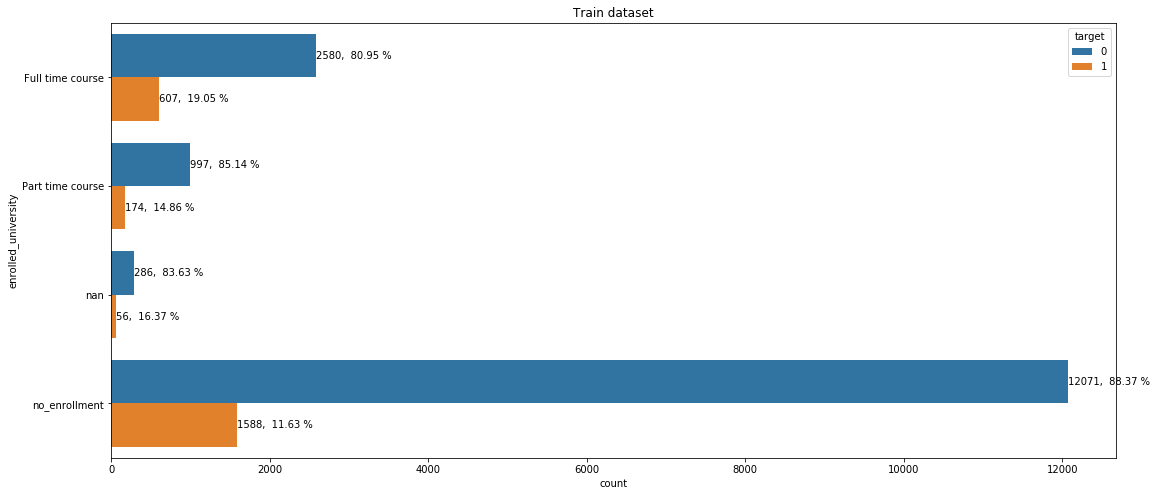

In [42]:
count_plot_by_hue(TrainData['enrolled_university'].astype(str), TrainData['target'].astype(str), 'Train dataset', (18,8))

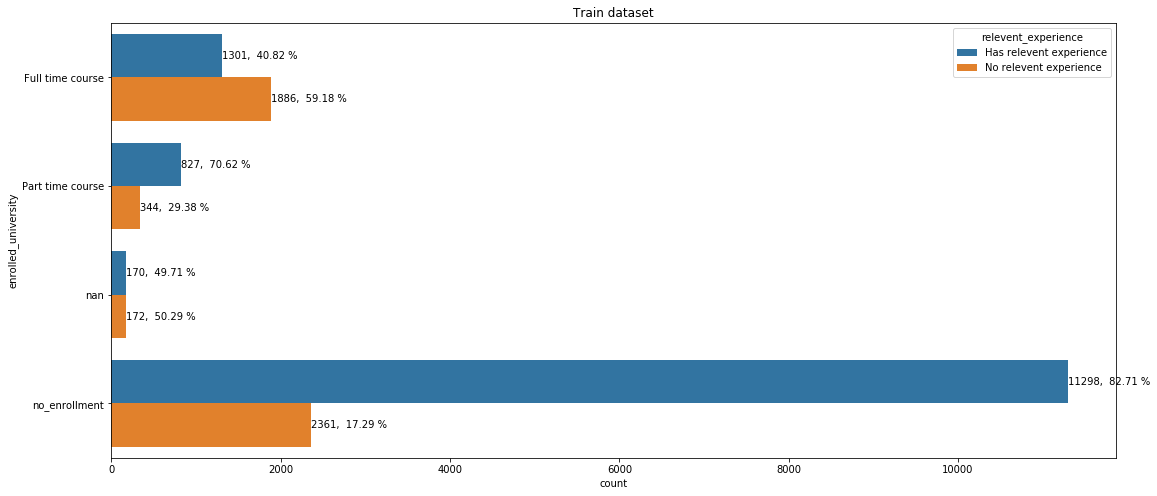

In [43]:
count_plot_by_hue(TrainData['enrolled_university'].astype(str), TrainData['relevent_experience'].astype(str), 'Train dataset', (18,8))

In [44]:
train["enrolled_university"].fillna('Dropout', inplace=True)
test["enrolled_university"].fillna('Dropout', inplace=True)

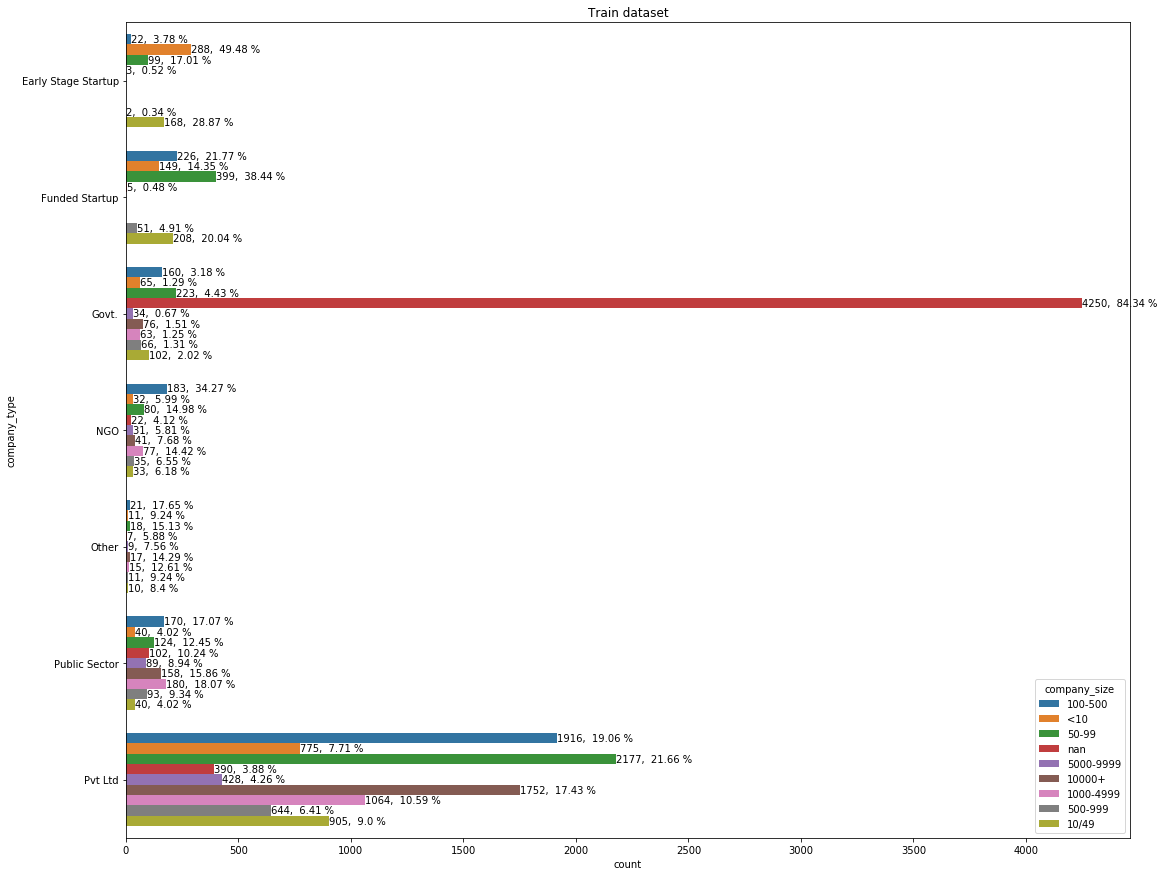

In [51]:
count_plot_by_hue(train['company_type'].astype(str), TrainData['company_size'].astype(str), 'Train dataset', (18,15))

In [52]:
train["company_size"].fillna('10-49', inplace=True)
test["company_size"].fillna('10-49', inplace=True)

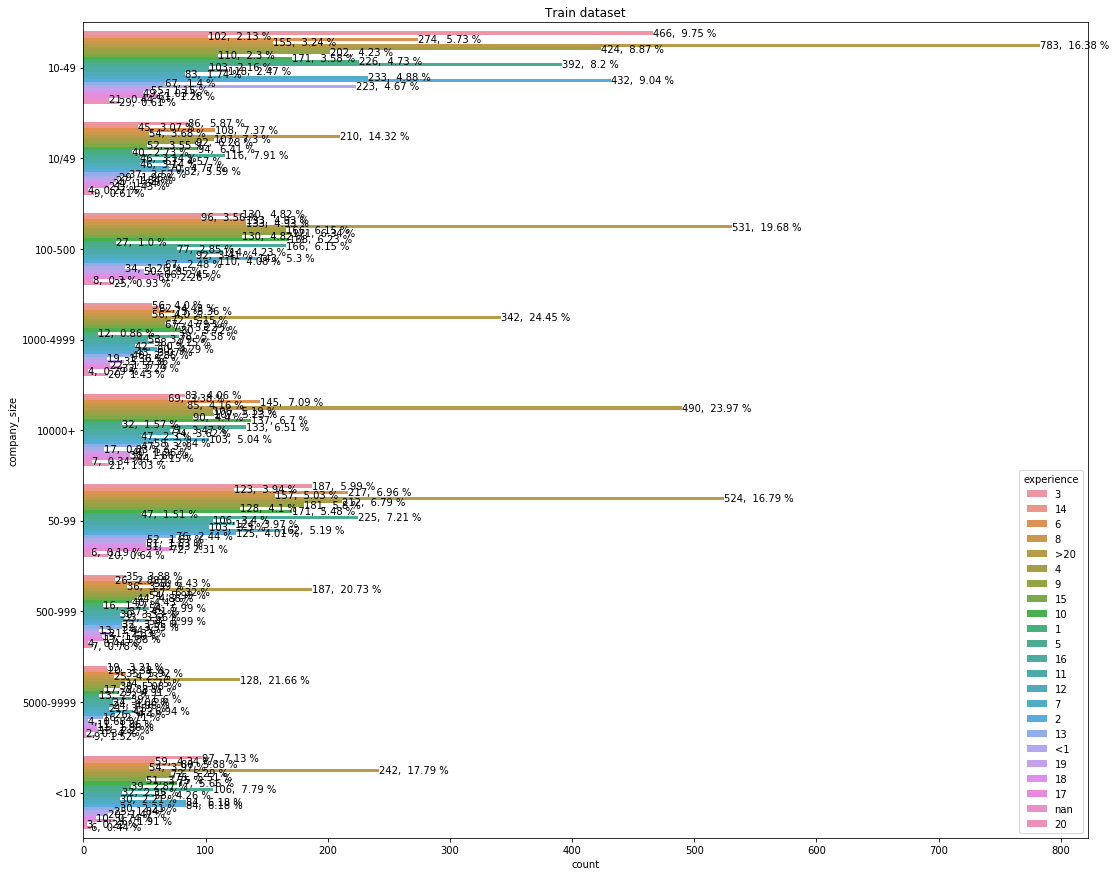

In [58]:
count_plot_by_hue(train['company_size'].astype(str), TrainData['experience'].astype(str), 'Train dataset', (18,15))

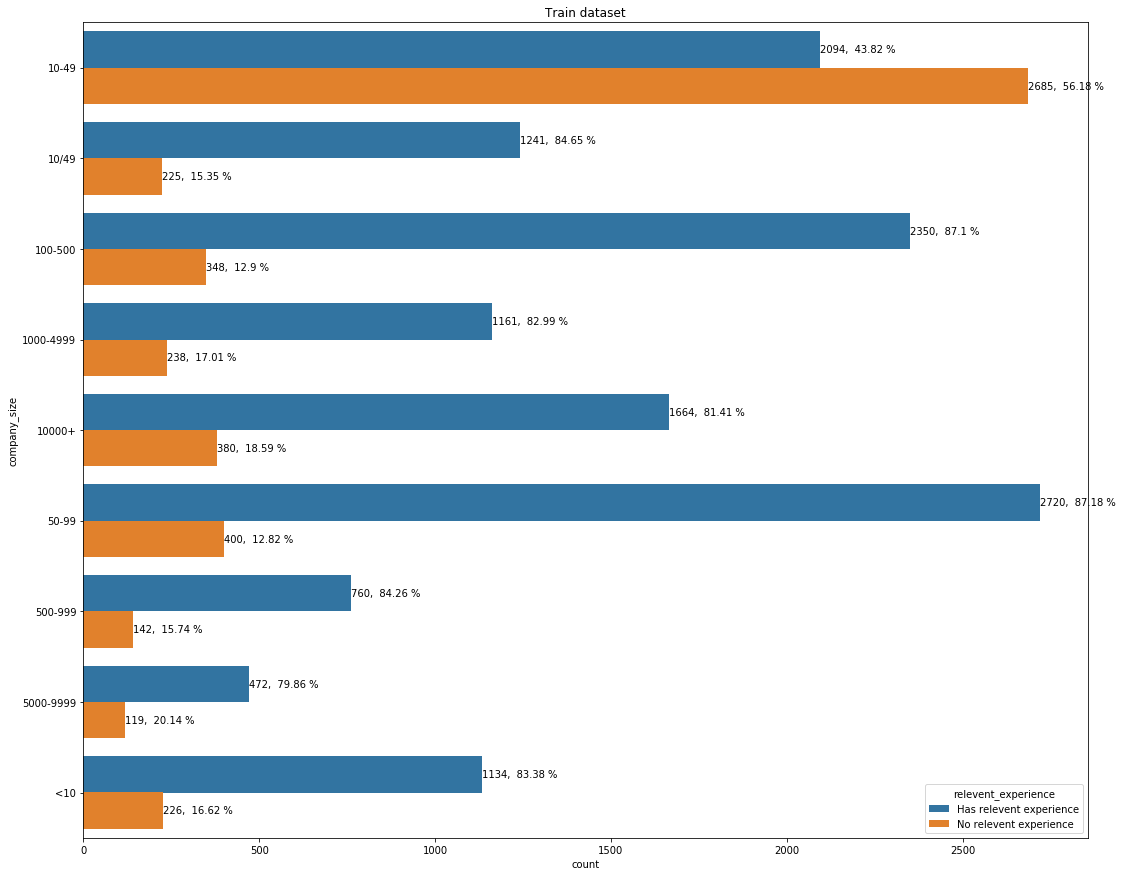

In [57]:
count_plot_by_hue(train['company_size'].astype(str), TrainData['relevent_experience'].astype(str), 'Train dataset', (18,15))

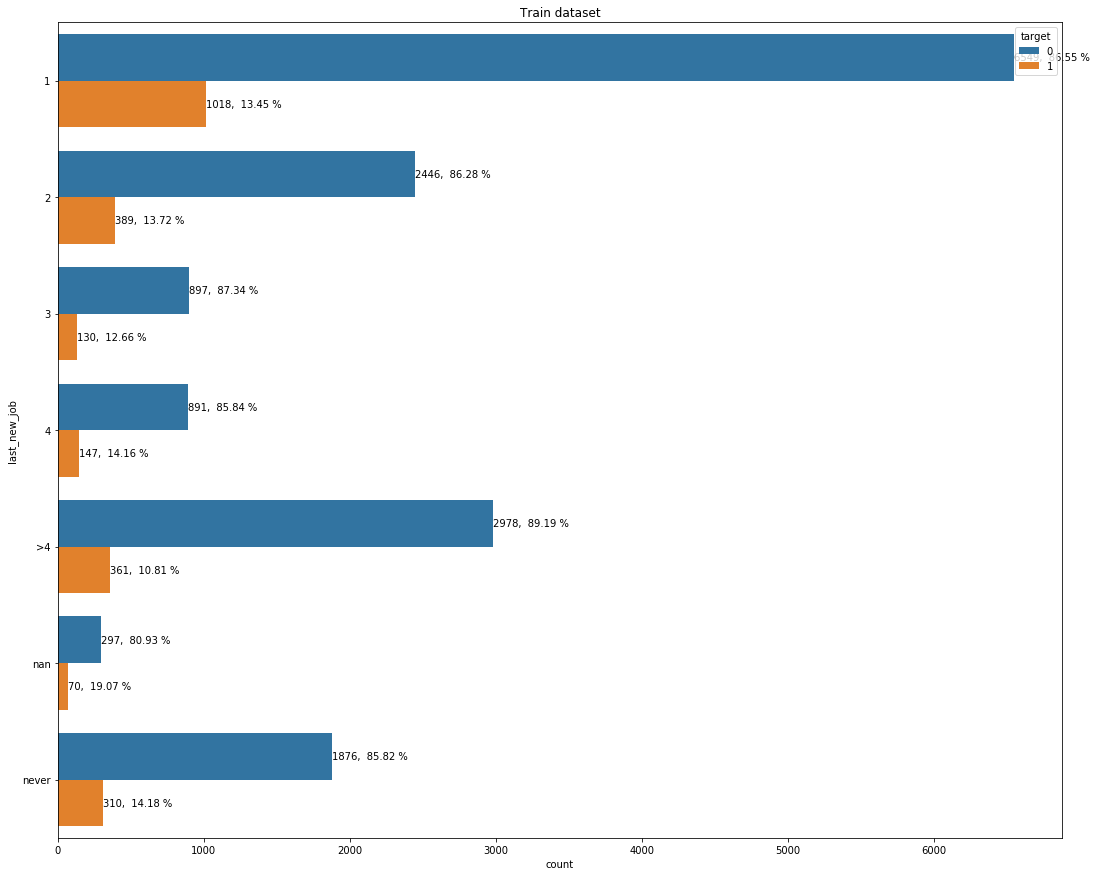

In [59]:
count_plot_by_hue(TrainData['last_new_job'].astype(str), TrainData['target'].astype(str), 'Train dataset', (18,15))

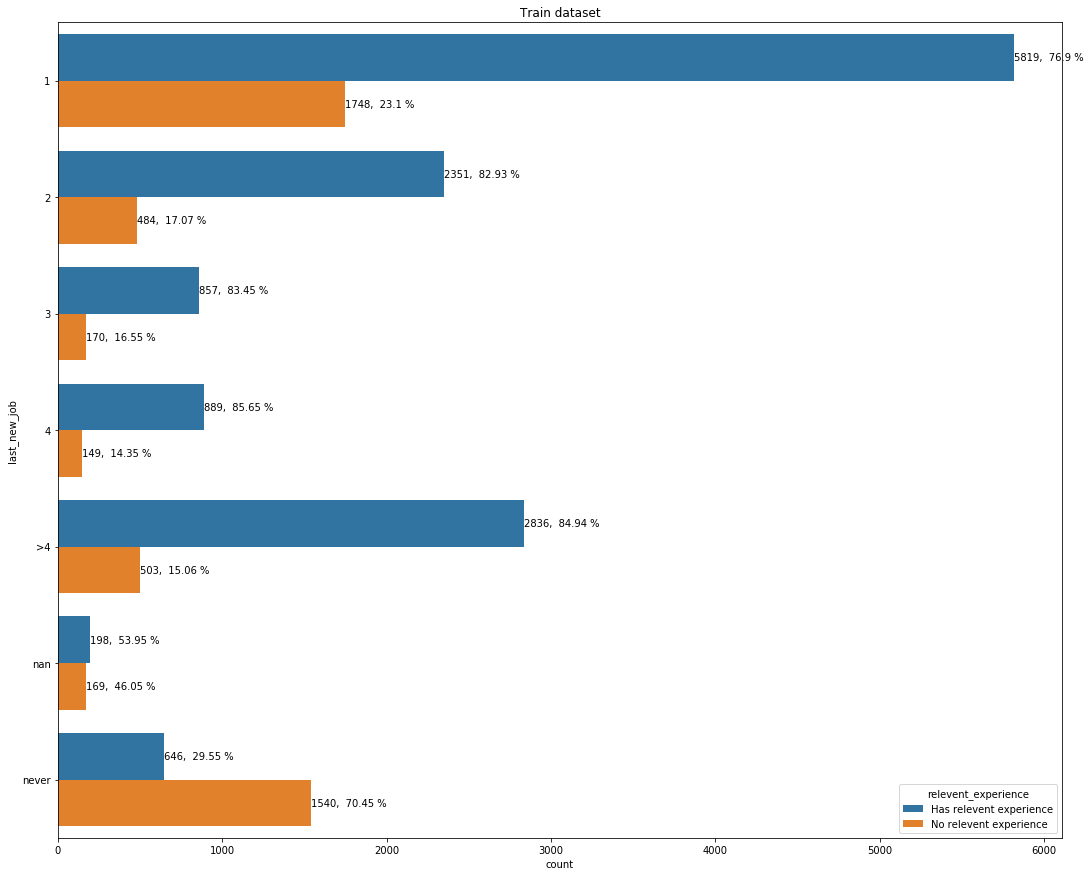

In [60]:
count_plot_by_hue(TrainData['last_new_job'].astype(str), TrainData['relevent_experience'].astype(str), 'Train dataset', (18,15))

In [61]:
train["last_new_job"].fillna('<1', inplace=True)
test["last_new_job"].fillna('<1', inplace=True)

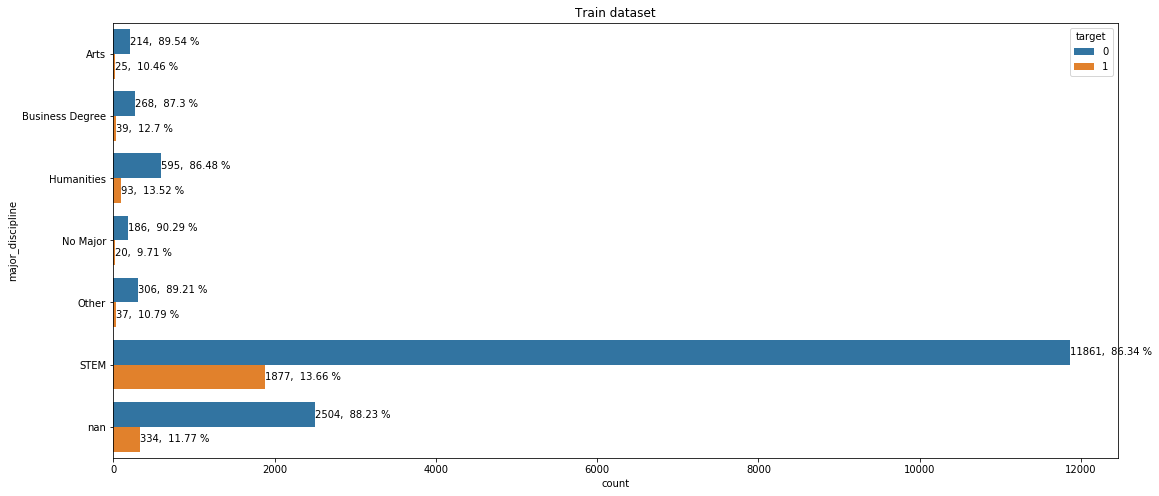

In [67]:
count_plot_by_hue(TrainData['major_discipline'].astype(str), TrainData['target'].astype(str), 'Train dataset', (18,8))

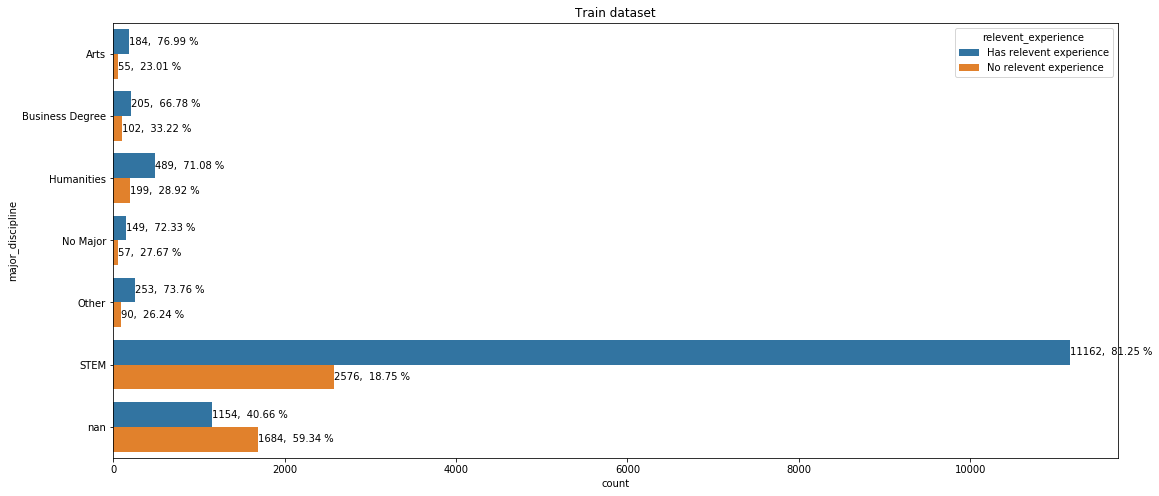

In [68]:
count_plot_by_hue(TrainData['major_discipline'].astype(str), TrainData['relevent_experience'].astype(str), 'Train dataset', (18,8))

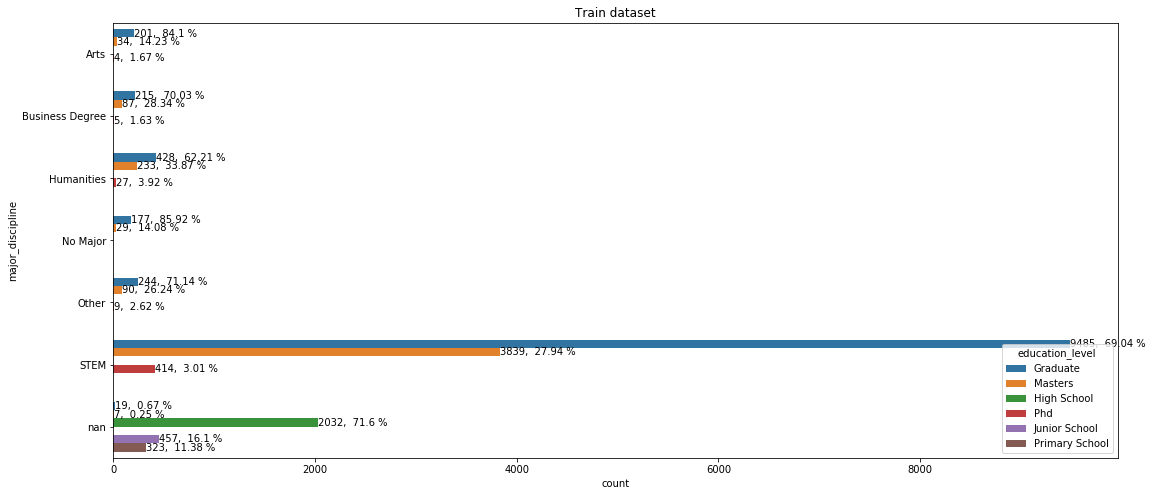

In [71]:
count_plot_by_hue(TrainData['major_discipline'].astype(str), train['education_level'].astype(str), 'Train dataset', (18,8))

In [72]:
train["major_discipline"].fillna('Normal Education', inplace=True)
test["major_discipline"].fillna('Normal Education', inplace=True)

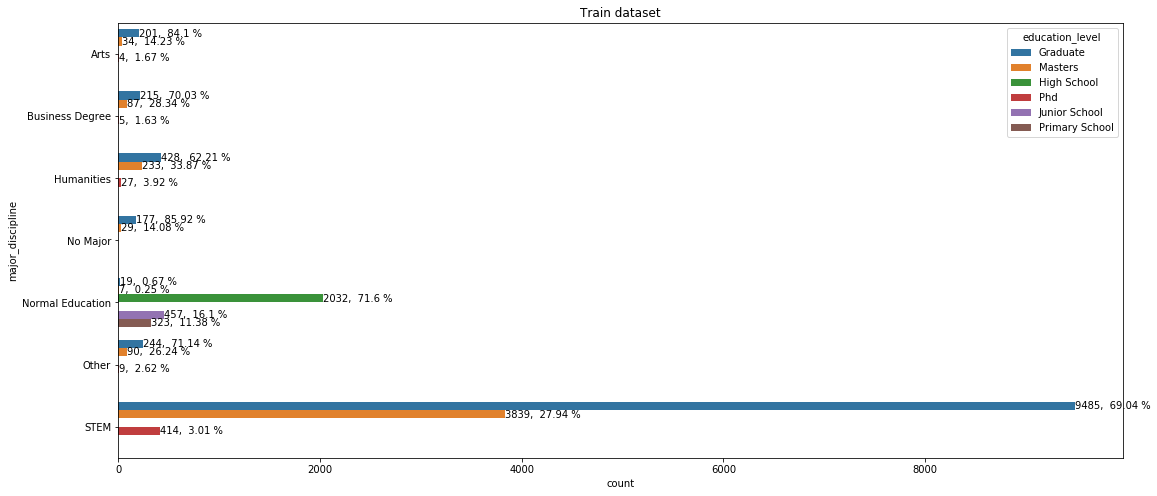

In [73]:
count_plot_by_hue(train['major_discipline'].astype(str), train['education_level'].astype(str), 'Train dataset', (18,8))

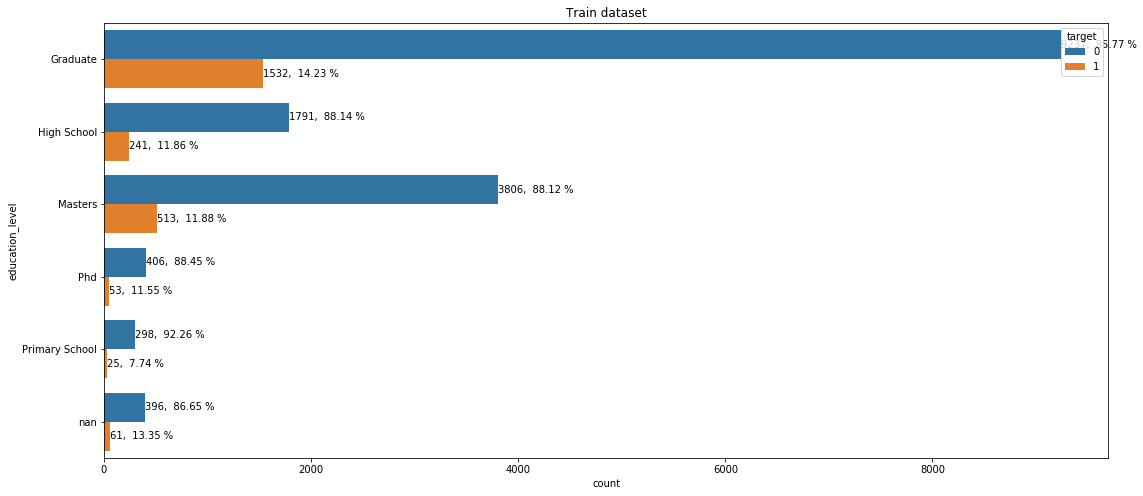

In [62]:
count_plot_by_hue(TrainData['education_level'].astype(str), TrainData['target'].astype(str), 'Train dataset', (18,8))

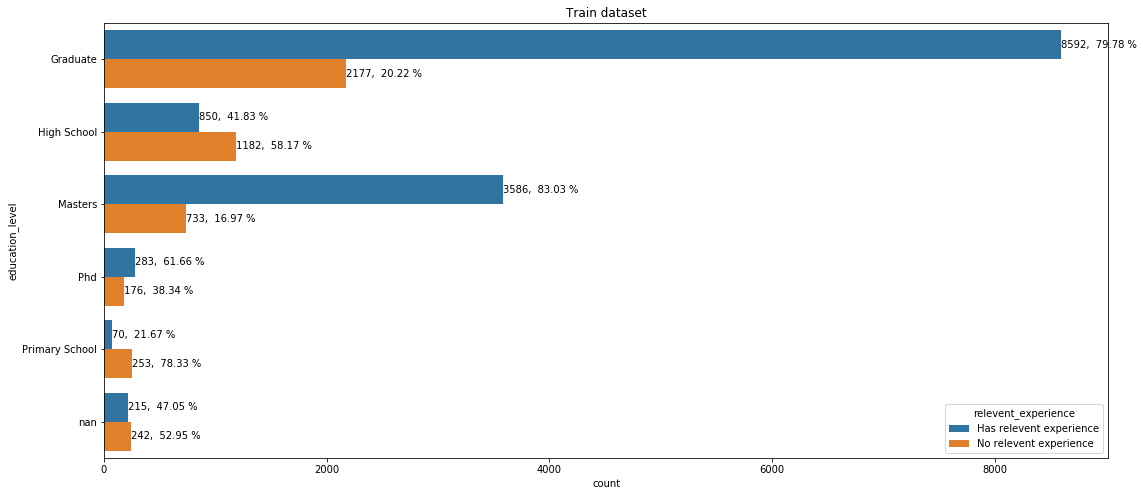

In [63]:
count_plot_by_hue(TrainData['education_level'].astype(str), TrainData['relevent_experience'].astype(str), 'Train dataset', (18,8))

In [64]:
train["education_level"].fillna('Junior School', inplace=True)
test["education_level"].fillna('Junior School', inplace=True)

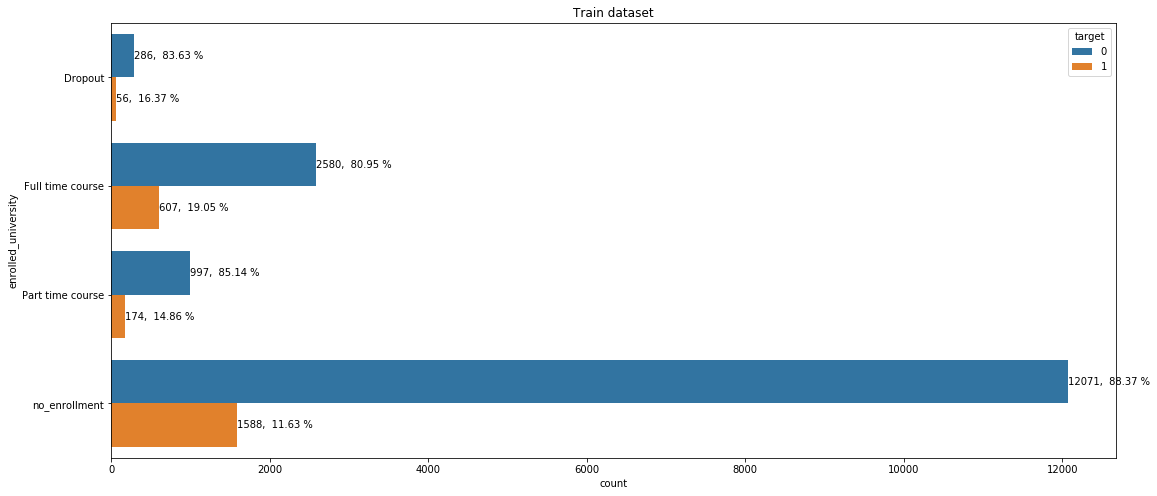

In [45]:
count_plot_by_hue(train['enrolled_university'].astype(str), TrainData['target'].astype(str), 'Train dataset', (18,8))

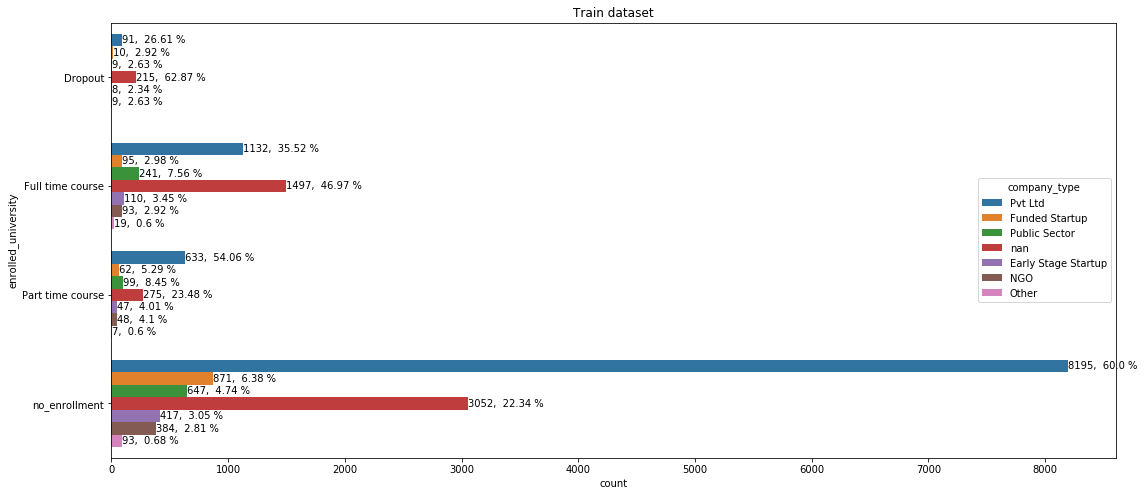

In [46]:
count_plot_by_hue(train['enrolled_university'].astype(str), TrainData['company_type'].astype(str), 'Train dataset', (18,8))

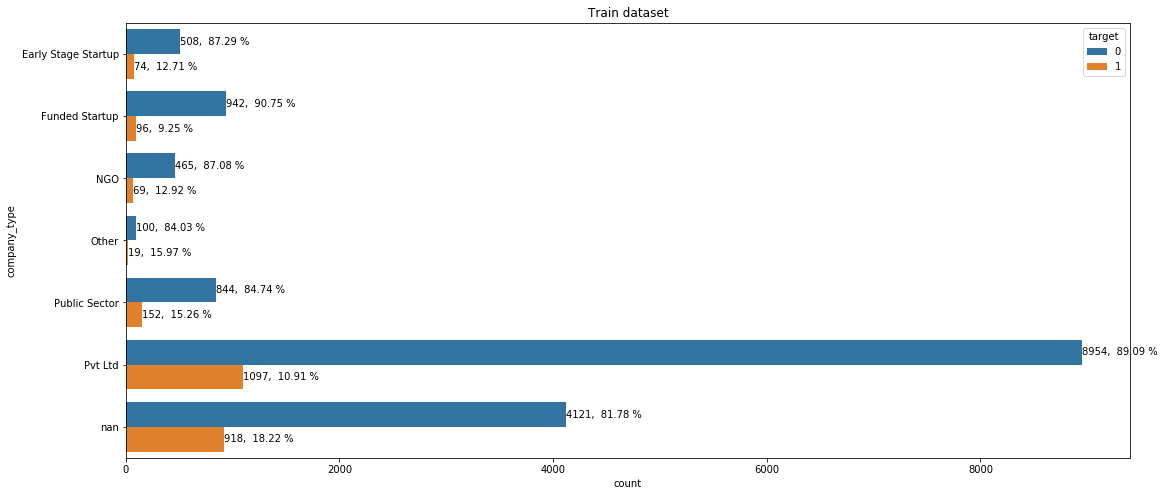

In [47]:
count_plot_by_hue(TrainData['company_type'].astype(str), TrainData['target'].astype(str), 'Train dataset', (18,8))

In [48]:
train["company_type"].fillna('Govt.', inplace=True)
test["company_type"].fillna('Govt.', inplace=True)

In [ ]:
count_plot_by_hue(train['enrolled_university'].astype(str), TrainData['relevent_experience'].astype(str), 'Train dataset', (18,8))

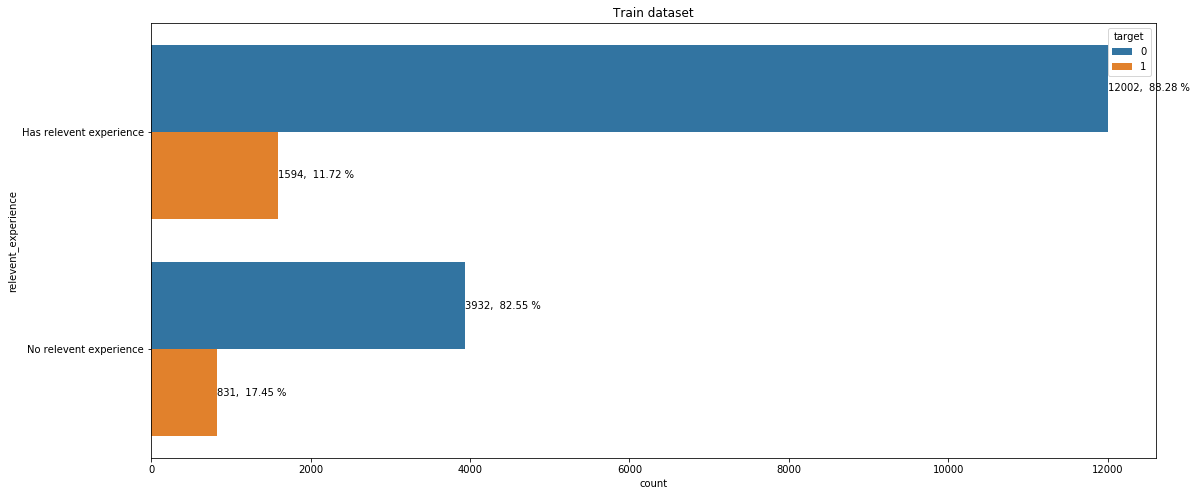

In [36]:
count_plot_by_hue(train['relevent_experience'].astype(str), TrainData['target'].astype(str), 'Train dataset', (18,8))

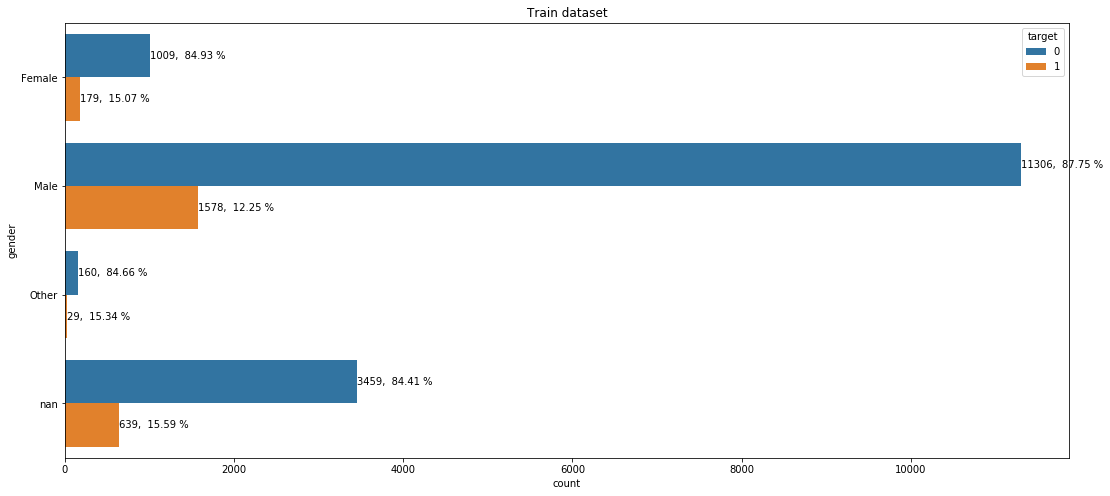

In [74]:
count_plot_by_hue(TrainData['gender'].astype(str), train['target'].astype(str), 'Train dataset', (18,8))

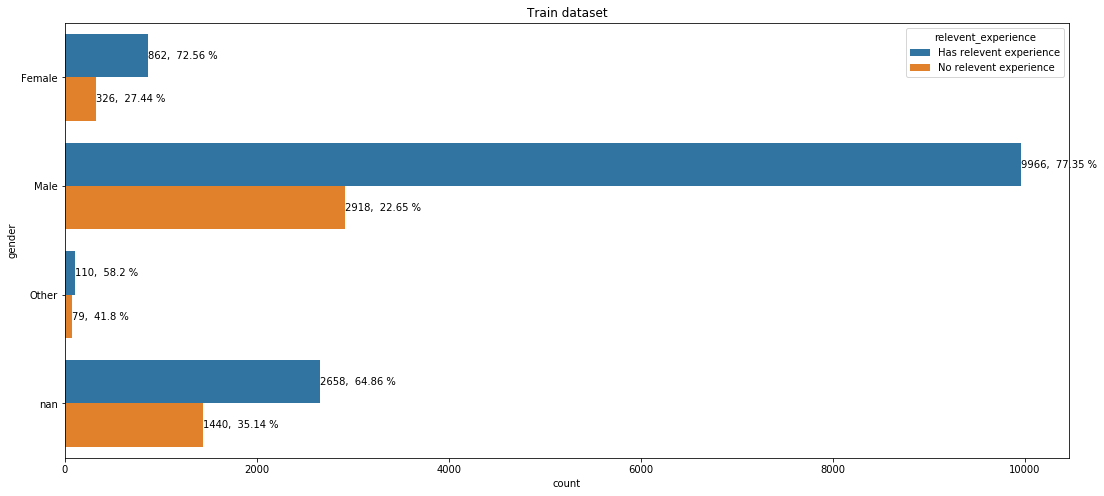

In [76]:
count_plot_by_hue(TrainData['gender'].astype(str), train['relevent_experience'].astype(str), 'Train dataset', (18,8))

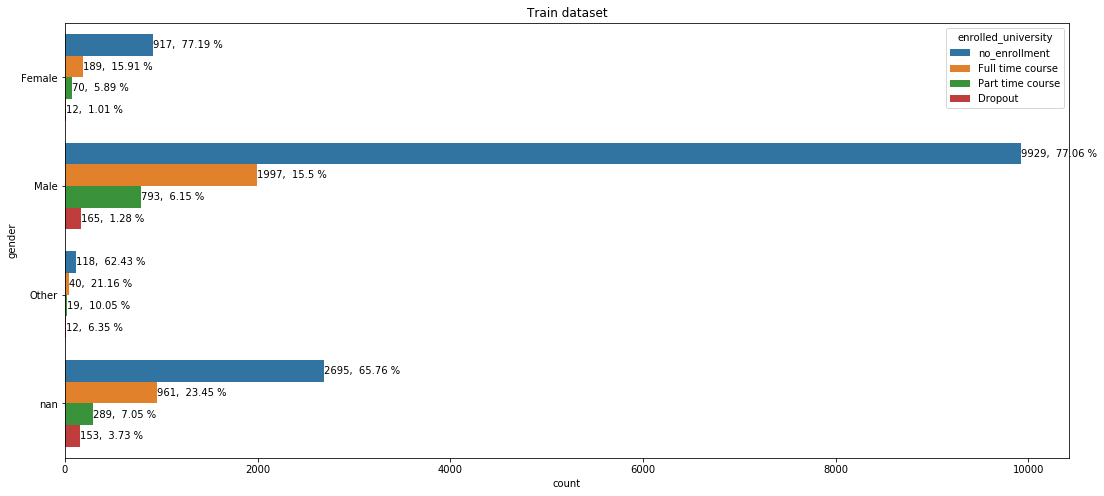

In [77]:
count_plot_by_hue(TrainData['gender'].astype(str), train['enrolled_university'].astype(str), 'Train dataset', (18,8))

In [86]:
df = train.loc[train.gender.isnull()]

In [87]:
df.head(1)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_no,city_no_cat
2,46,city_16,0.91,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0,16,0-30


In [ ]:
df

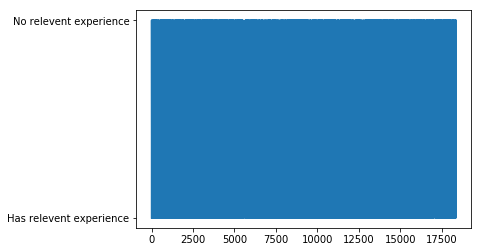

In [102]:
plt.plot(df.relevent_experience)

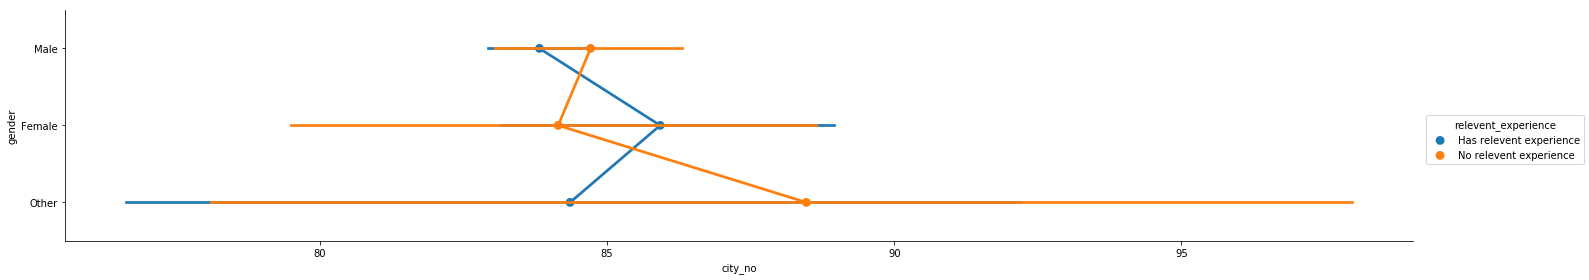

In [119]:
plt.figure(figsize=(18,20))
sns.factorplot(x='city_no',y='gender',hue='relevent_experience',data=train,height=10, aspect=5)
plt.show()

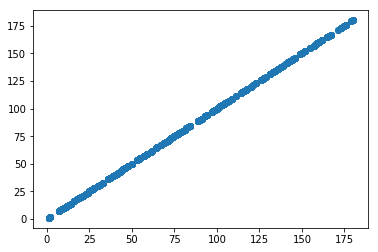

In [101]:
plt.scatter(train['city_no'], train['city_no'])

In [97]:
sns.factorplot(x="education_level", y="relevent_experience", hue="target", kind="swarm", data=train);

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
sns.categorical

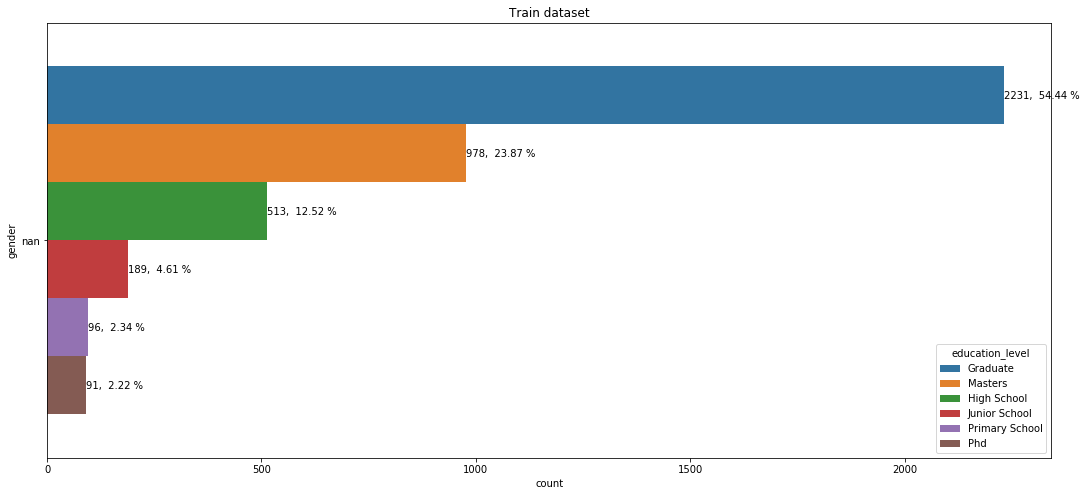

In [89]:
count_plot_by_hue(df['gender'].astype(str), df['education_level'].astype(str), 'Train dataset', (18,8))

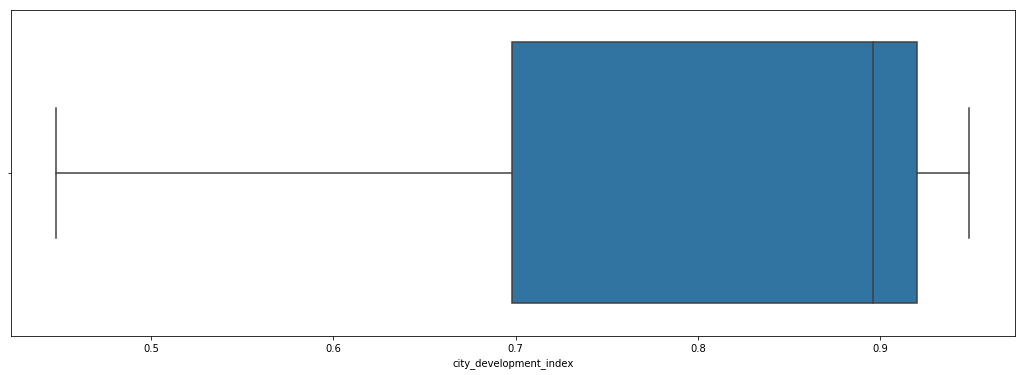

In [126]:
plt.figure(figsize=(18, 6))
sns.boxplot(df["city_development_index"])
plt.show()

In [319]:
sns.countplot(train.loc[(train.last_new_job == "1" ) and (train.experience == "1" ), 'gender'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [315]:
train.loc[(train.enrollee_id % 2 != 0), 'gender']

3          Male
4          Male
7          Male
8          Male
10         Male
11         Male
12         Male
14         Male
16         Male
18         Male
20         Male
21         Male
22         Male
28         Male
29         Male
30         Male
32         Male
33         Male
34         Male
35         Male
37         Male
41         Male
43         Male
46         Male
49         Male
51         Male
53         Male
54       Female
57         Male
59         Male
          ...  
18298      Male
18299      Male
18300      Male
18302      Male
18307      Male
18309      Male
18314      Male
18315    Female
18318      Male
18319      Male
18320      Male
18321      Male
18322      Male
18326      Male
18327      Male
18328      Male
18332      Male
18334      Male
18337      Male
18338      Male
18340      Male
18344      Male
18345      Male
18346      Male
18347      Male
18348      Male
18351      Male
18355      Male
18357      Male
18358    Female
Name: gender, Length: 91

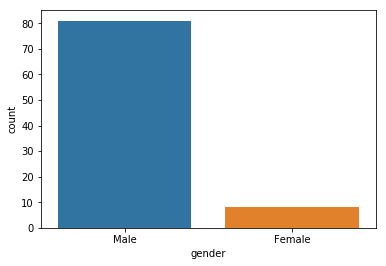

In [342]:
sns.countplot(TrainData.query('last_new_job == "1" & experience =="19"')["gender"])

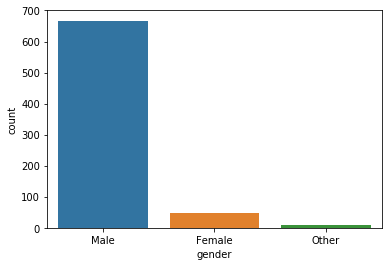

In [200]:
sns.countplot(train.query('city_development_index == 0.910 & relevent_experience =="Has relevent experience" & education_level == "Graduate"')["gender"])

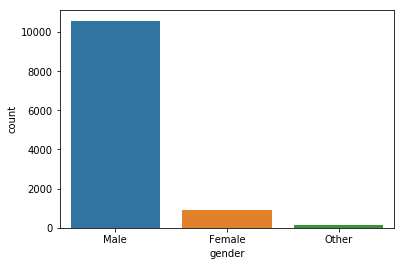

In [202]:
sns.countplot(test["gender"])

In [203]:
train["gender"].fillna('Male', inplace=True)
test["gender"].fillna('Male.', inplace=True)

In [196]:
train.query('city_development_index == 0.920 & relevent_experience =="Has relevent experience" ')["gender"]

8          Male
14         Male
16         Male
28         Male
31         Male
33         Male
37         Male
39         Male
48       Female
53         Male
54       Female
55          NaN
65         Male
70         Male
71         Male
73         Male
74         Male
75         Male
81       Female
85         Male
89         Male
102        Male
104        Male
110         NaN
113       Other
142        Male
143        Male
144        Male
154         NaN
164        Male
          ...  
18183       NaN
18193      Male
18212      Male
18215      Male
18218      Male
18231      Male
18232    Female
18233       NaN
18243      Male
18250      Male
18253       NaN
18261      Male
18269      Male
18273       NaN
18276      Male
18277      Male
18286       NaN
18287    Female
18289      Male
18296       NaN
18305    Female
18311      Male
18313      Male
18317       NaN
18318      Male
18319      Male
18326       NaN
18334      Male
18341      Male
18354      Male
Name: gender, Length: 39

In [167]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_no,city_no_cat
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0,16,0-30
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,10-49,Govt.,2,88,1,100,90-120
22,20897,city_136,0.897,NaN,Has relevent experience,no_enrollment,High School,Normal Education,3,10-49,Govt.,1,12,0,136,120-150
23,25178,city_28,0.939,NaN,No relevent experience,Dropout,Graduate,STEM,1,10000+,Govt.,never,11,0,28,0-30
30,23129,city_103,0.920,NaN,No relevent experience,no_enrollment,Graduate,STEM,8,10000+,Pvt Ltd,<1,104,0,103,90-120
43,8861,city_160,0.920,NaN,No relevent experience,no_enrollment,Masters,Humanities,2,<10,Early Stage Startup,1,43,0,160,150-180
45,18446,city_30,0.698,NaN,Has relevent experience,no_enrollment,Graduate,STEM,8,100-500,Public Sector,3,7,0,30,0-30
50,5298,city_104,0.924,NaN,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,NGO,1,7,0,104,90-120
55,26862,city_103,0.920,NaN,Has relevent experience,Part time course,Masters,STEM,>20,100-500,Pvt Ltd,>4,79,1,103,90-120
64,16154,city_103,0.920,NaN,No relevent experience,Full time course,Graduate,STEM,2,10-49,Govt.,never,132,1,103,90-120


In [75]:
TrainData.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_no
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0,149
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0,83
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0,16
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0,64
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1,100


In [132]:
TrainData.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_no
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0,149
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0,83
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0,16
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0,64
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1,100


In [10]:
train = TrainData.copy()
test = TestData.copy()

In [12]:
def days_late_xform(dl):
    if 0 < dl <= 30: return '0-30'
    elif 30 < dl <= 60: return '30-60'
    elif 60 < dl <= 90: return '60-90'
    elif 90 < dl <= 120: return '90-120'
    elif 120 < dl <= 150: return '120-150'
    elif 150 < dl <= 180: return '150-180'
    else: return 'None'
    
    
train['city_no_cat'] = train['city_no'].map(days_late_xform)
test['city_no_cat'] = test['city_no'].map(days_late_xform)

In [11]:
train["company_type"].fillna(-99, inplace=True)
train["company_size"].fillna(-99, inplace=True)
train["gender"].fillna(-99, inplace=True)
train["major_discipline"].fillna(-99, inplace=True)
train["education_level"].fillna(-99, inplace=True)
train["last_new_job"].fillna(-99, inplace=True)
train["enrolled_university"].fillna(-99, inplace=True)
train["experience"].fillna(0, inplace=True)

test["company_type"].fillna(-99, inplace=True)
test["company_size"].fillna(-99, inplace=True)
test["gender"].fillna(-99, inplace=True)
test["major_discipline"].fillna(-99, inplace=True)
test["education_level"].fillna(-99, inplace=True)
test["last_new_job"].fillna(-99, inplace=True)
test["enrolled_university"].fillna(-99, inplace=True)
test["experience"].fillna(0, inplace=True)

In [12]:
train["company_type_miss"] = train["company_type"].isnull()
train["company_size_miss"] = train["company_size"].isnull()
train["gender_miss"] = train["gender"].isnull()
train["major_discipline_miss"] = train["major_discipline"].isnull()
train["education_level_miss"] = train["education_level"].isnull()
train["last_new_job_miss"] = train["last_new_job"].isnull()
train["enrolled_university_miss"] = train["enrolled_university"].isnull()
train["experience_miss"] = train["experience"].isnull()

train["company_type_miss"] = train["company_type_miss"]*1
train["company_size_miss"] = train["company_size_miss"]*1
train["gender_miss"] = train["gender_miss"]*1
train["major_discipline_miss"] = train["major_discipline_miss"]*1
train["education_level_miss"] = train["education_level_miss"]*1
train["last_new_job_miss"] = train["last_new_job_miss"]*1
train["enrolled_university_miss"] = train["enrolled_university_miss"]*1
train["experience_miss"] = train["experience_miss"]*1

In [13]:
test["company_type_miss"] = test["company_type"].isnull()
test["company_size_miss"] = test["company_size"].isnull()
test["gender_miss"] = test["gender"].isnull()
test["major_discipline_miss"] = test["major_discipline"].isnull()
test["education_level_miss"] = test["education_level"].isnull()
test["last_new_job_miss"] = test["last_new_job"].isnull()
test["enrolled_university_miss"] = test["enrolled_university"].isnull()
test["experience_miss"] = test["experience"].isnull()

test["company_type_miss"] = test["company_type_miss"]*1
test["company_size_miss"] = test["company_size_miss"]*1
test["gender_miss"] = test["gender_miss"]*1
test["major_discipline_miss"] = test["major_discipline_miss"]*1
test["education_level_miss"] = test["education_level_miss"]*1
test["last_new_job_miss"] = test["last_new_job_miss"]*1
test["enrolled_university_miss"] = test["enrolled_university_miss"]*1
test["experience_miss"] = test["experience_miss"]*1

# VISUALIZATION

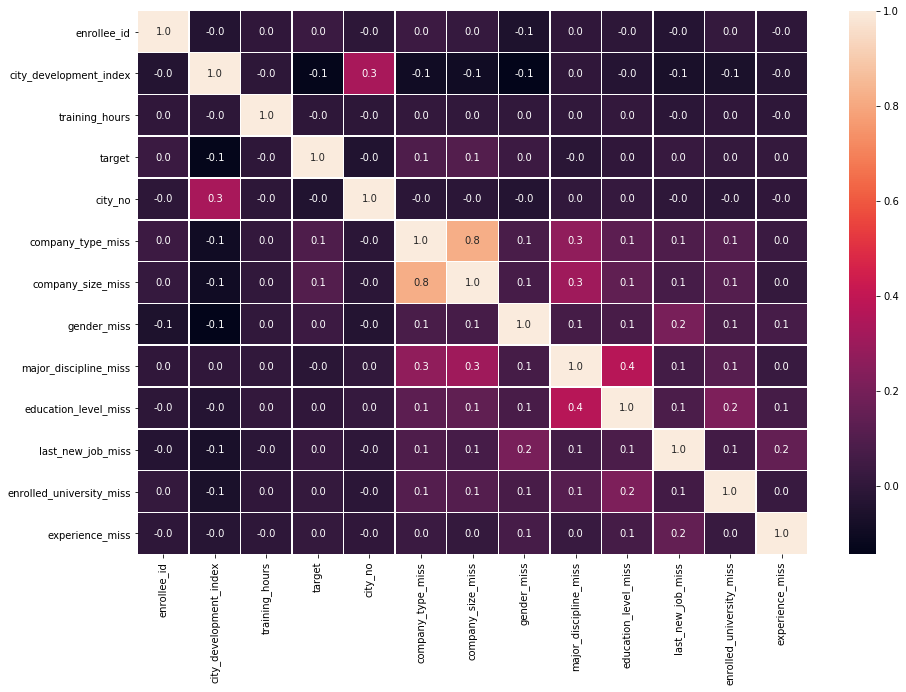

In [111]:
# TRAIN DATA`
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

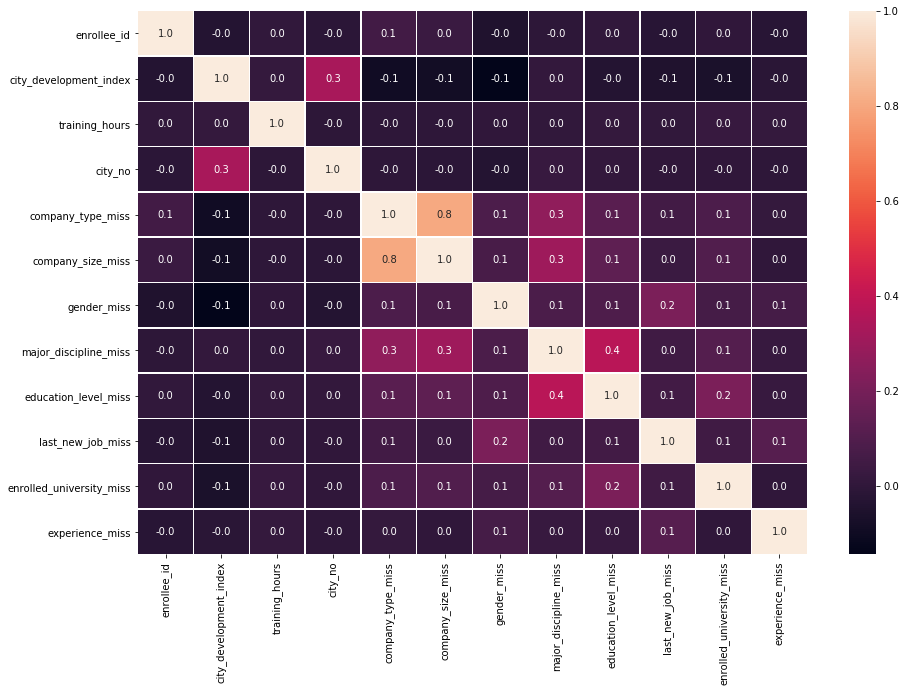

In [112]:
# TEST DATA
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(test.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

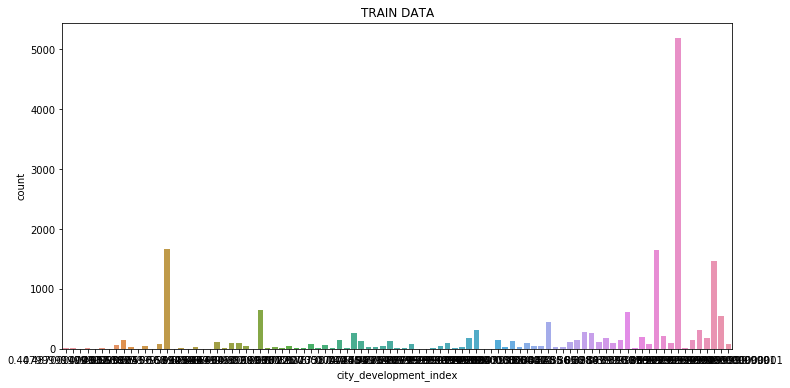

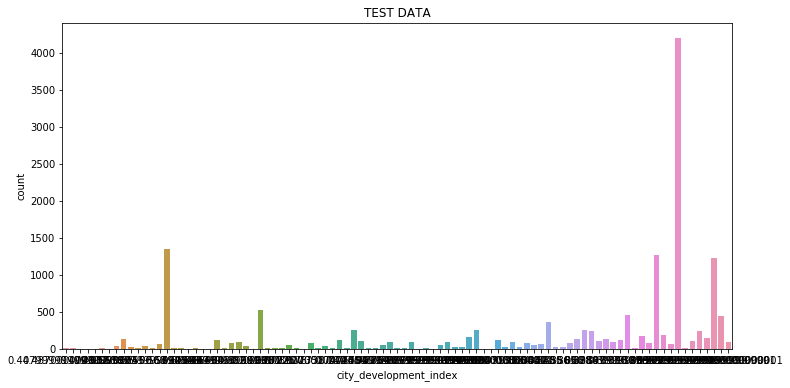

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(train["city_development_index"])
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(test["city_development_index"])
plt.title('TEST DATA')
plt.show()

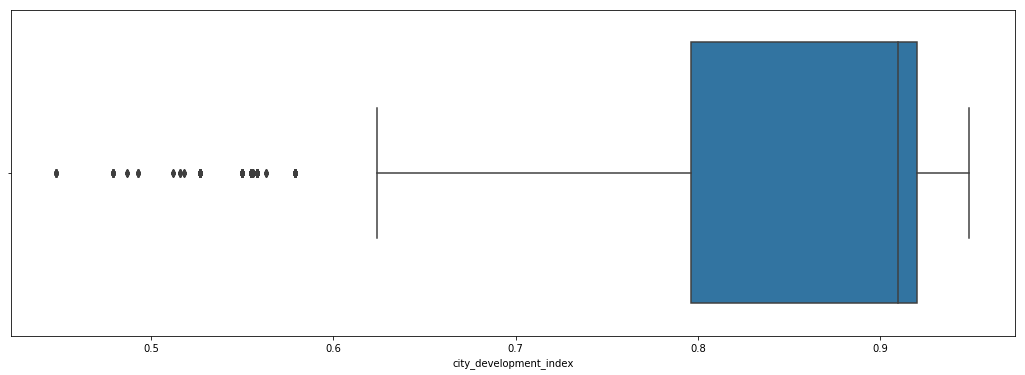

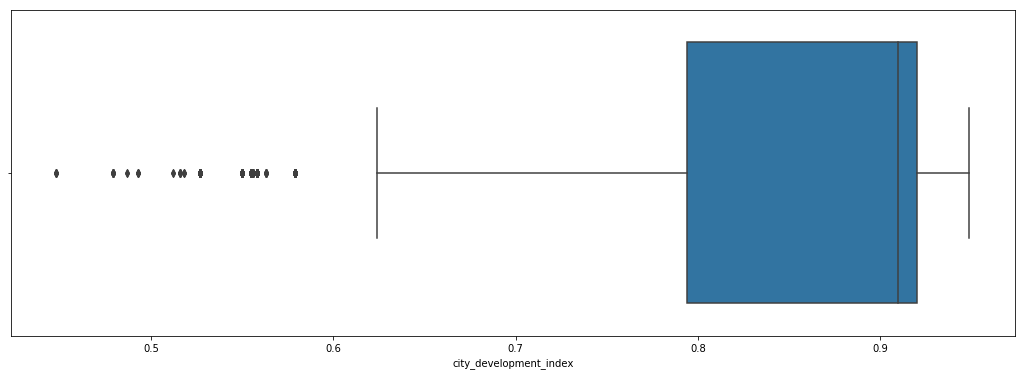

In [14]:
plt.figure(figsize=(18, 6))
sns.boxplot(train["city_development_index"])
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(test["city_development_index"])
plt.show()

In [15]:
q75, q25 = np.percentile(train.city_development_index.dropna(), [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.6)
max = q75 + (iqr*1.6)

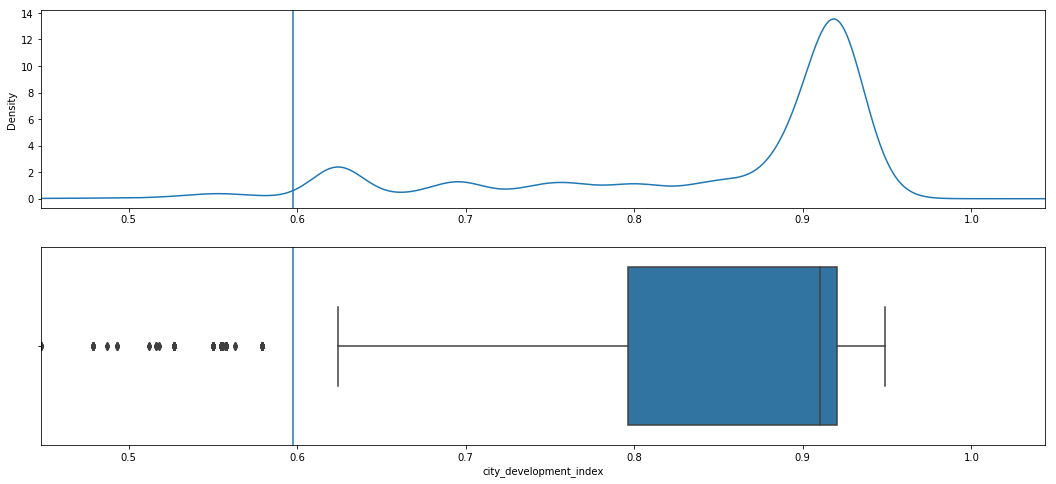

In [16]:
i = 'city_development_index'
 
plt.figure(figsize=(18,8))
plt.subplot(211)
plt.xlim(train[i].min(), train[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)
 
ax = train[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(train[i].min(), train[i].max()*1.1)
sns.boxplot(x=train[i])
plt.axvline(x=min)
plt.axvline(x=max)

In [17]:
train.loc[train['city_development_index'] < min, 'city_development_index'] = train["city_development_index"].median()

In [18]:
q75, q25 = np.percentile(test.city_development_index.dropna(), [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.6)
max = q75 + (iqr*1.6)

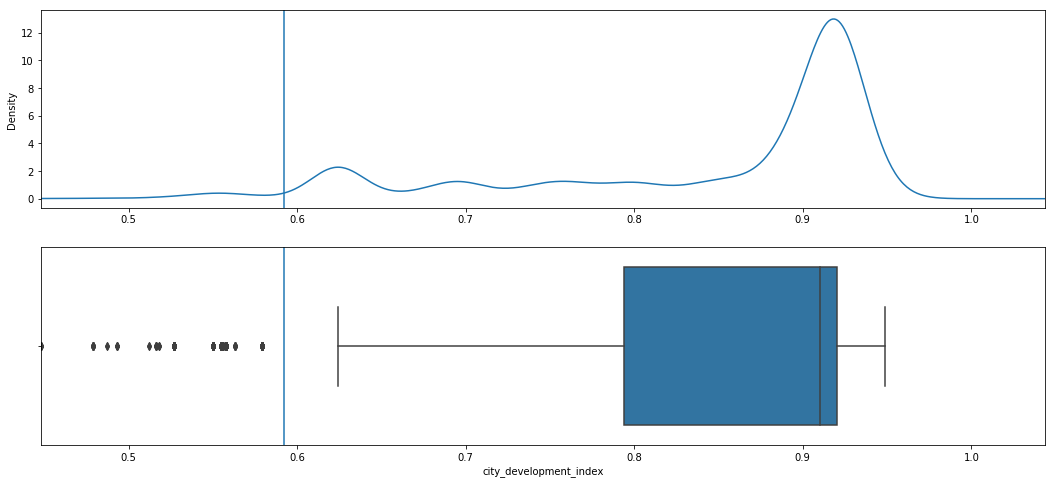

In [19]:
i = 'city_development_index'
 
plt.figure(figsize=(18,8))
plt.subplot(211)
plt.xlim(test[i].min(), test[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)
 
ax = test[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(test[i].min(), test[i].max()*1.1)
sns.boxplot(x=test[i])
plt.axvline(x=min)
plt.axvline(x=max)

In [20]:
test.loc[test['city_development_index'] < min, 'city_development_index'] = test["city_development_index"].median()

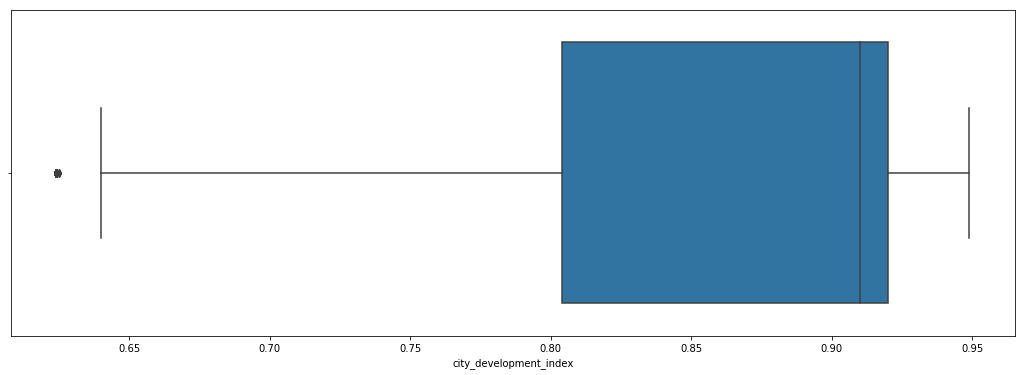

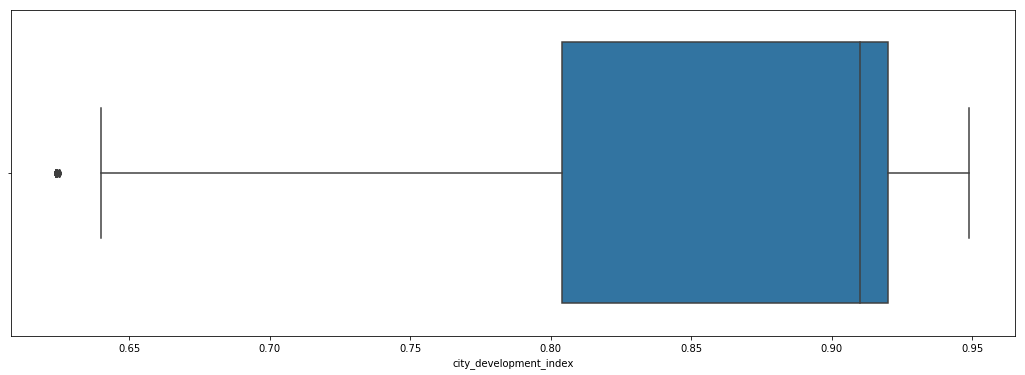

In [21]:
plt.figure(figsize=(18, 6))
sns.boxplot(train["city_development_index"])
plt.show()

plt.figure(figsize=(18, 6))
sns.boxplot(test["city_development_index"])
plt.show()

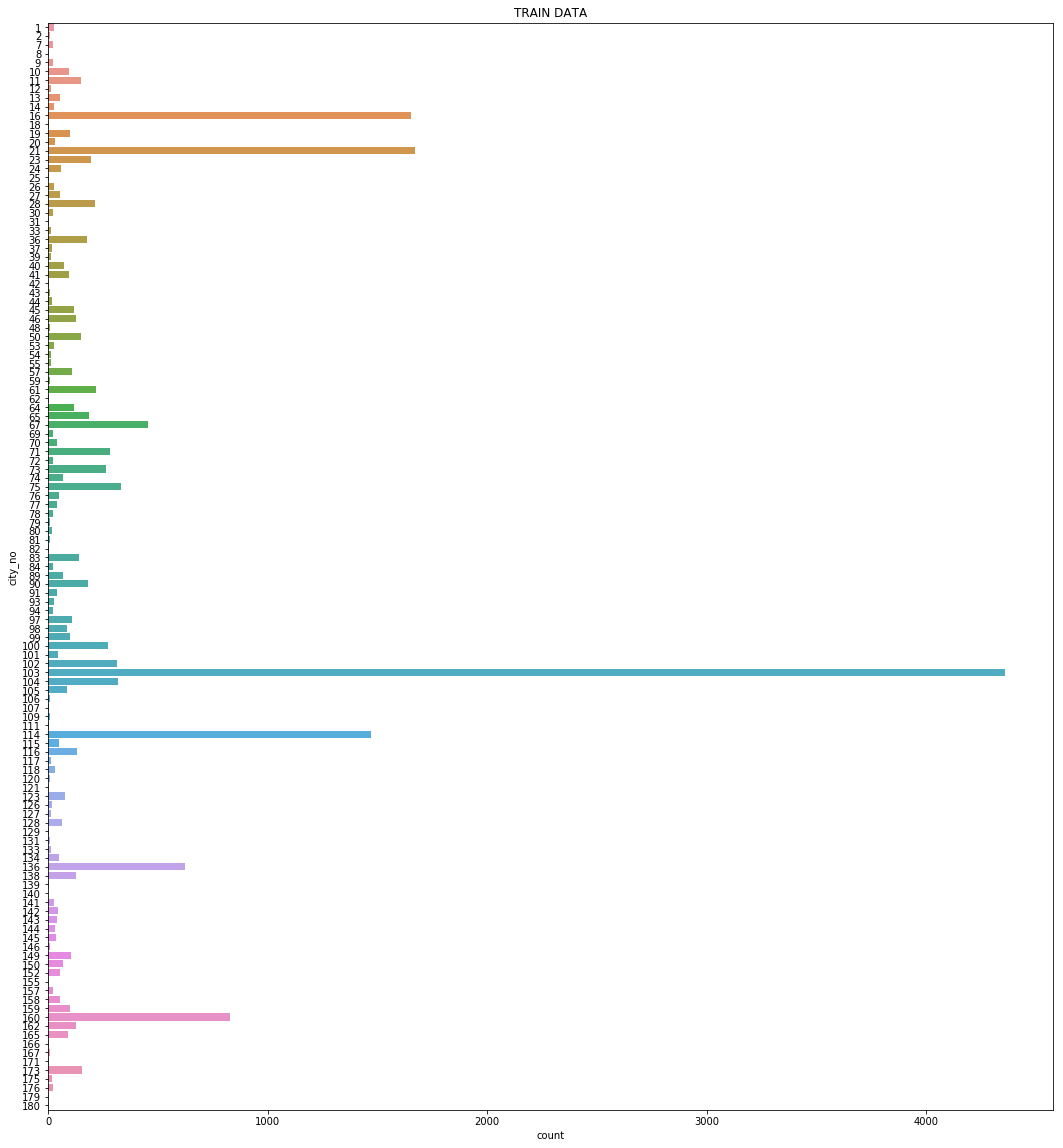

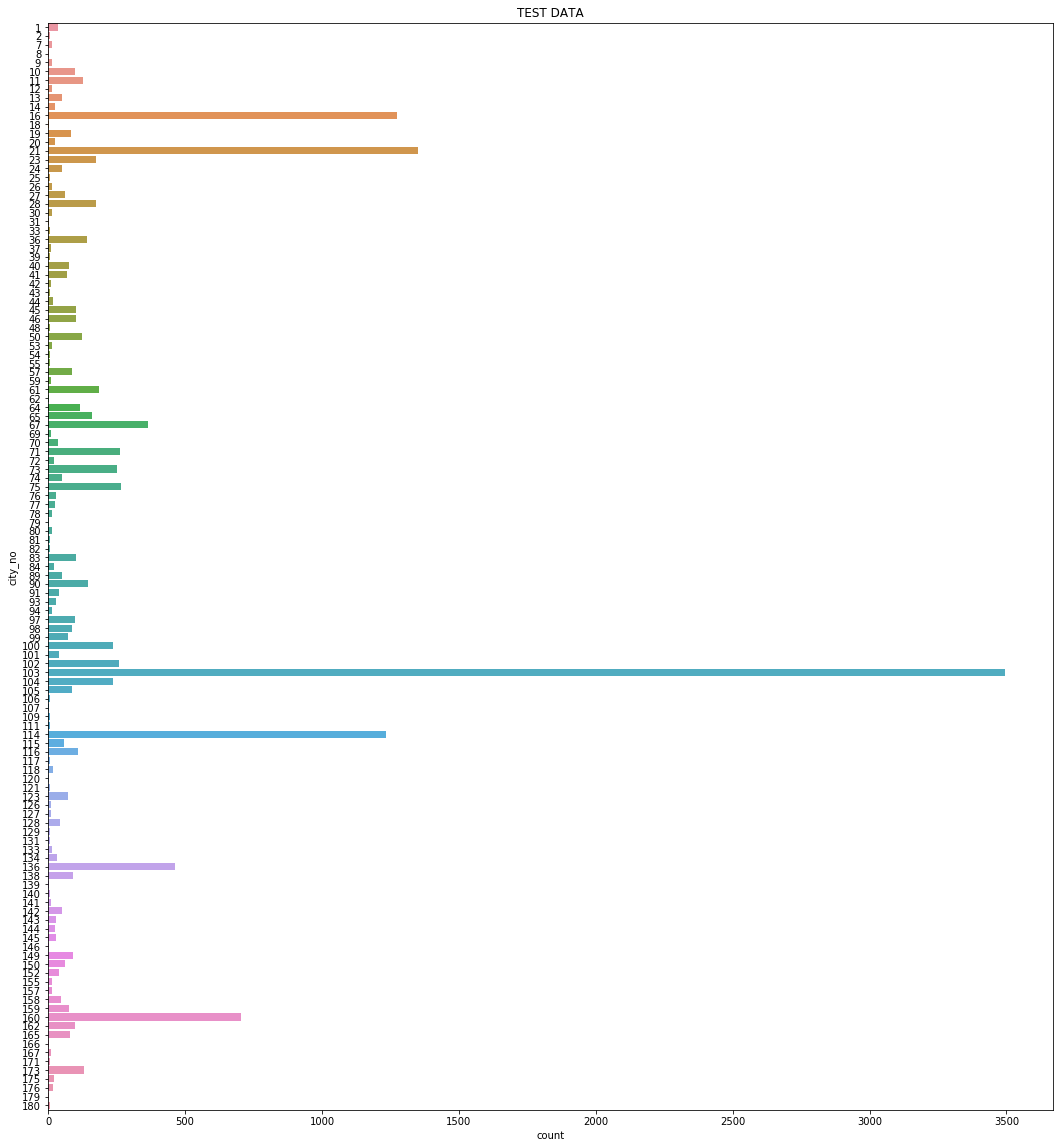

In [73]:
plt.figure(figsize=(18, 20))
sns.countplot(y=train["city_no"])
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(18, 20))
sns.countplot(y=test["city_no"])
plt.title('TEST DATA')
plt.show()

In [20]:
train["training_hours"].max()

336

In [21]:
test["training_hours"].nunique()

241

(array([ 100.,  347.,  771., 1396., 2355., 3343., 3895., 3475., 1869.,
         808.]),
 array([0.69314718, 1.20584076, 1.71853433, 2.23122791, 2.74392148,
        3.25661506, 3.76930863, 4.28200221, 4.79469578, 5.30738936,
        5.82008293]),
 <a list of 10 Patch objects>)

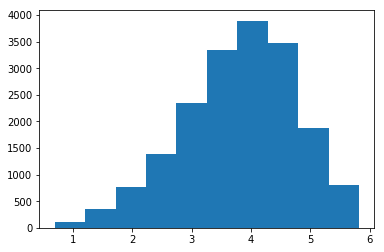

In [31]:
plt.hist(np.log1p(train["training_hours"]))

In [168]:
train["train_hr_log"] = np.log1p(train["training_hours"])
test["train_hr_log"] = np.log1p(test["training_hours"])

In [169]:
train["train_hr_log_norm"] = (train["train_hr_log"] - train["train_hr_log"].min()) / (train["train_hr_log"].max() - train["train_hr_log"].min())
test["train_hr_log_norm"] = (test["train_hr_log"] - test["train_hr_log"].min()) / (test["train_hr_log"].max() - test["train_hr_log"].min())

In [44]:
train["train_hr_log_stand"] = (train["train_hr_log"] - train["train_hr_log"].mean()) / train["train_hr_log"].std()
test["train_hr_log_stand"] = (test["train_hr_log"] - test["train_hr_log"].mean()) / test["train_hr_log"].std()

In [45]:
train.head(1)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_no,train_hr_log,train_hr_log_norm,train_hr_log_stand
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0,149,4.672829,0.77623,0.914342


(array([ 100.,  347.,  771., 1396., 2355., 3343., 3895., 3475., 1869.,
         808.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

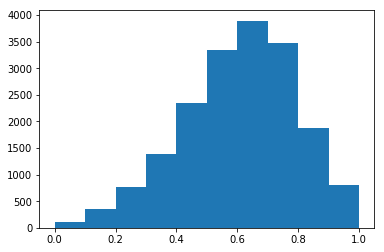

In [48]:
plt.hist((train["train_hr_log_norm"]))

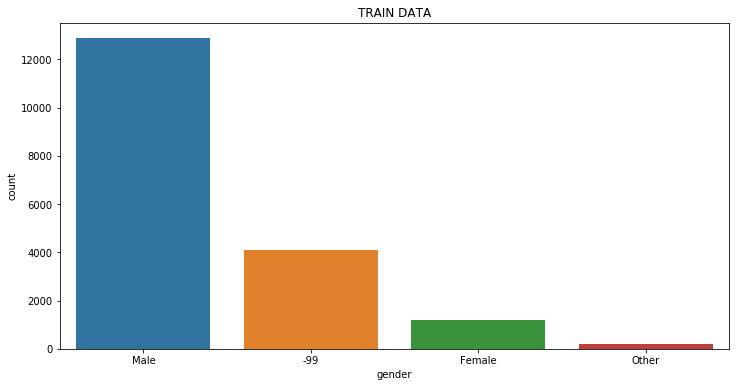

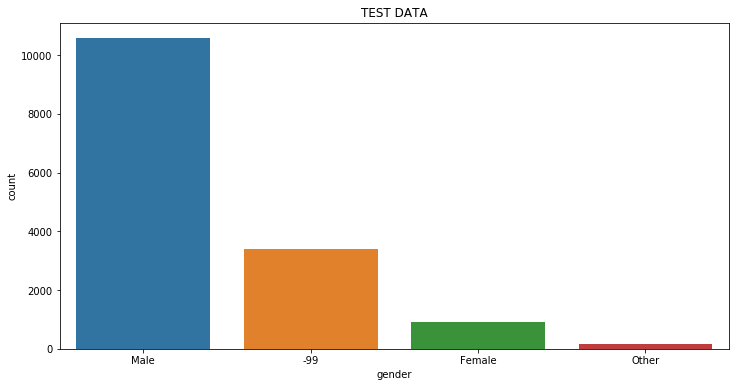

In [167]:
plt.figure(figsize=(12, 6))
sns.countplot(train["gender"], order = train["gender"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(test["gender"], order = test["gender"].value_counts().index)
plt.title('TEST DATA')
plt.show()

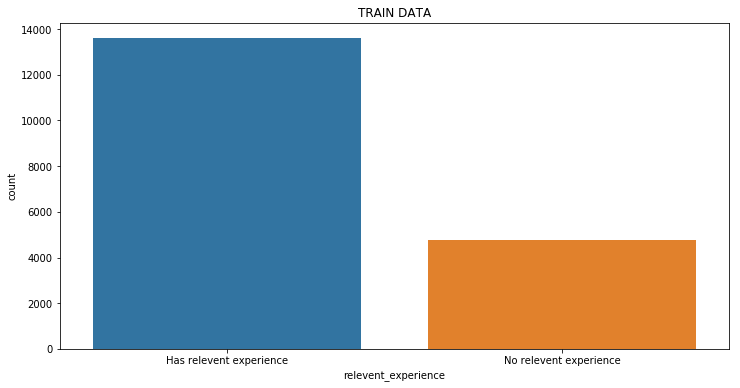

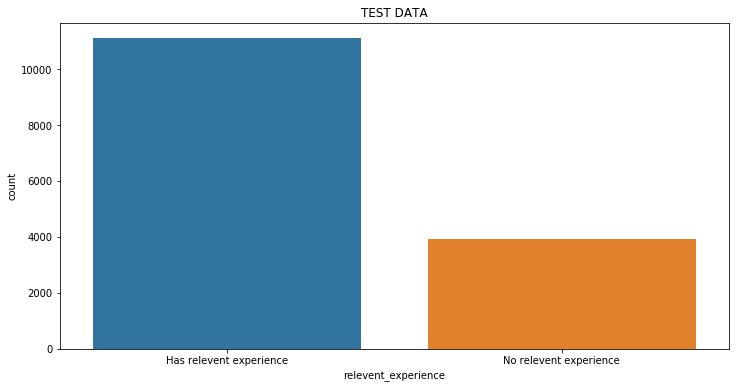

In [75]:
plt.figure(figsize=(12, 6))
sns.countplot(train["relevent_experience"], order = train["relevent_experience"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(test["relevent_experience"], order = test["relevent_experience"].value_counts().index)
plt.title('TEST DATA')
plt.show()

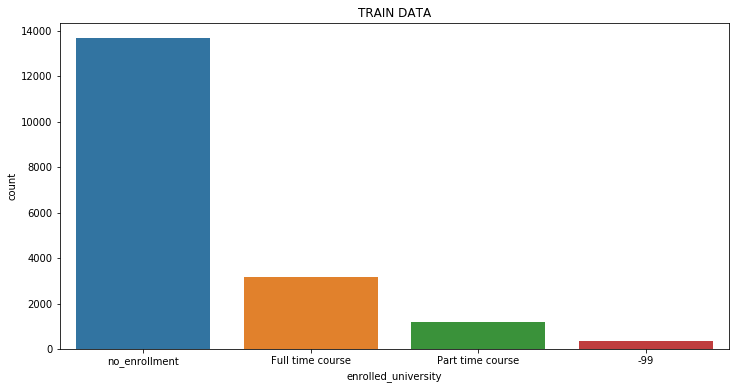

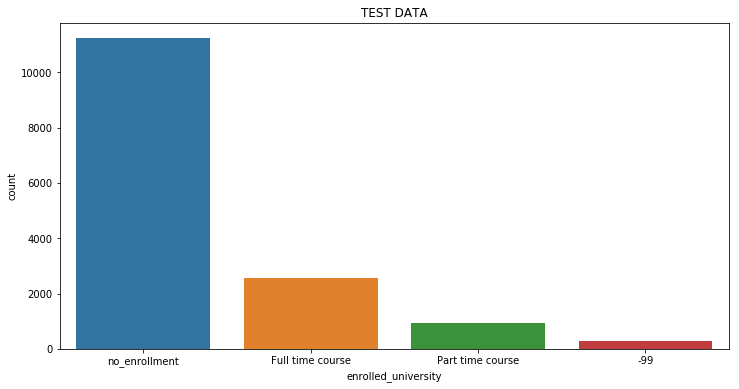

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(train["enrolled_university"], order = train["enrolled_university"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(test["enrolled_university"], order = test["enrolled_university"].value_counts().index)
plt.title('TEST DATA')
plt.show()

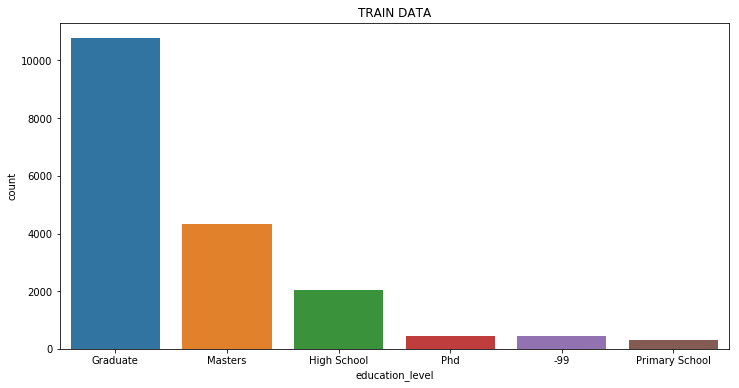

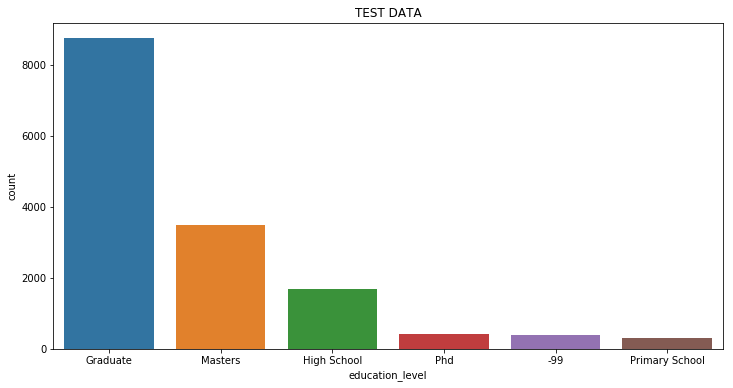

In [77]:
TrainData.loc[TrainData.target == 1, 'enrollee_id']TrainData.loc[TrainData.target == 1, 'enrollee_id']plt.figure(figsize=(12, 6))
sns.countplot(train["education_level"], order = train["education_level"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(test["education_level"], order = test["education_level"].value_counts().index)
plt.title('TEST DATA')
plt.show()

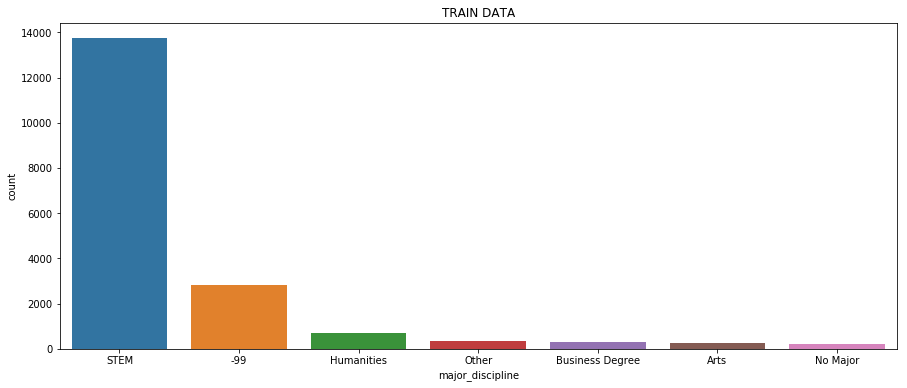

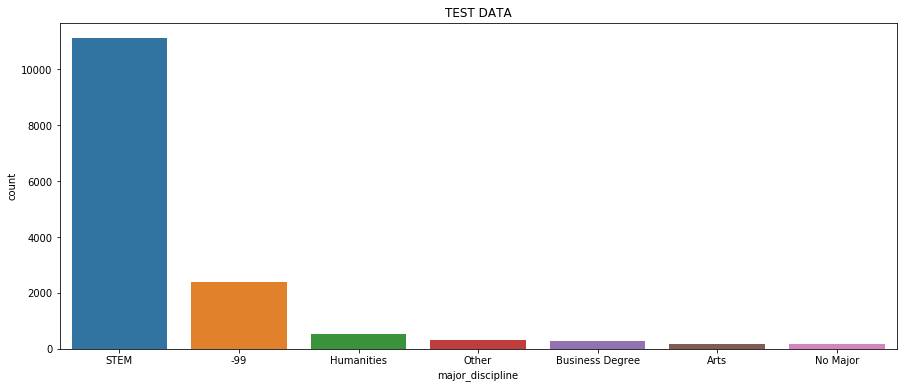

In [78]:
plt.figure(figsize=(15, 6))
sns.countplot(train["major_discipline"], order = train["major_discipline"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(test["major_discipline"], order = test["major_discipline"].value_counts().index)
plt.title('TEST DATA')
plt.show()

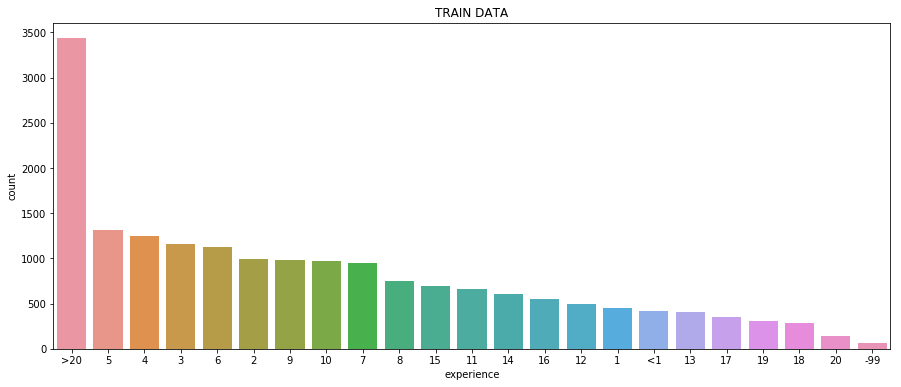

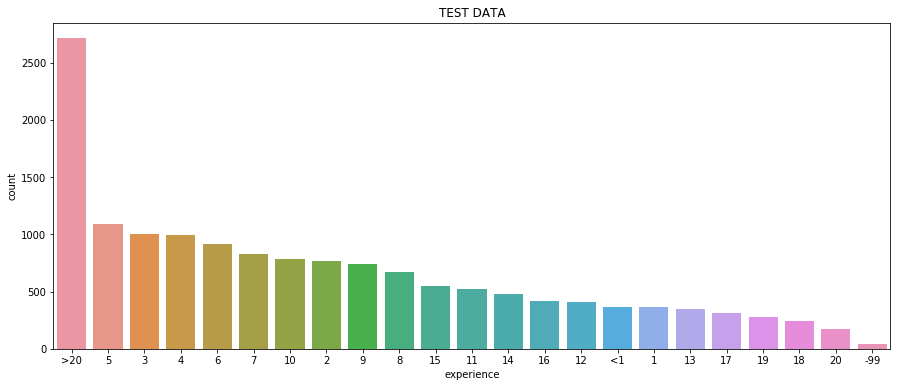

In [79]:
plt.figure(figsize=(15, 6))
sns.countplot(train["experience"], order = train["experience"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(test["experience"], order = test["experience"].value_counts().index)
plt.title('TEST DATA')
plt.show()

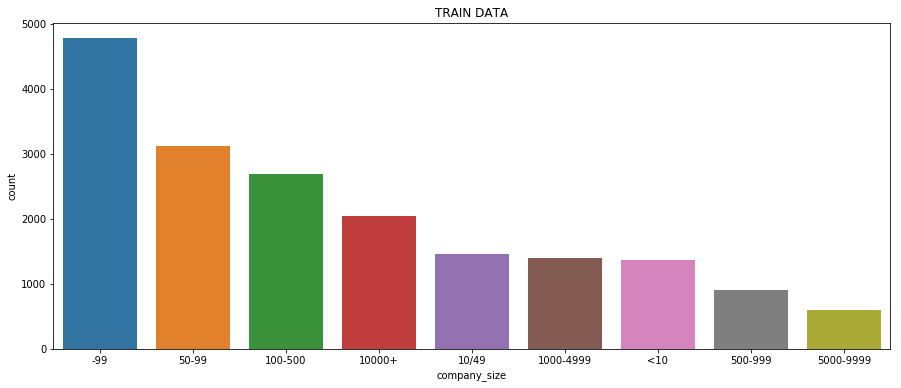

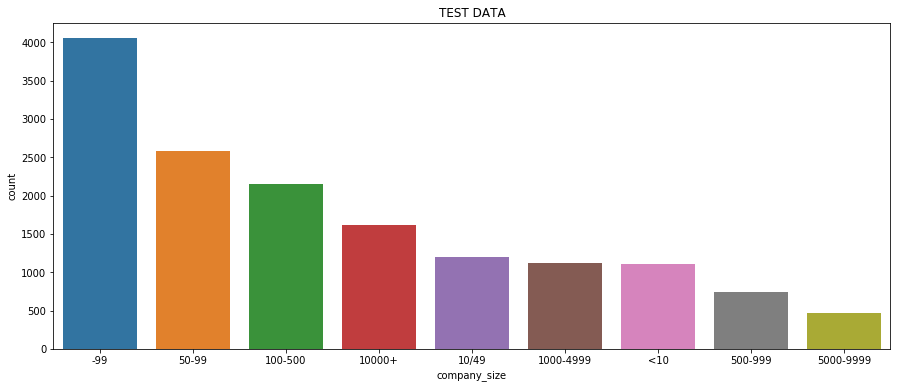

In [80]:
plt.figure(figsize=(15, 6))
sns.countplot(train["company_size"], order = train["company_size"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(test["company_size"], order = test["company_size"].value_counts().index)
plt.title('TEST DATA')
plt.show()

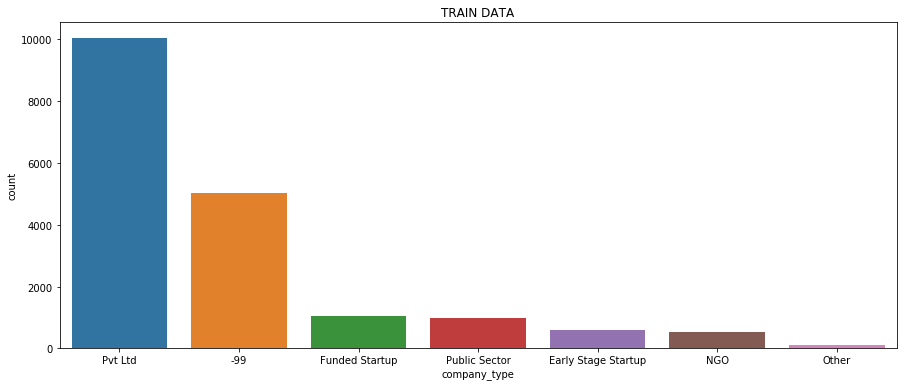

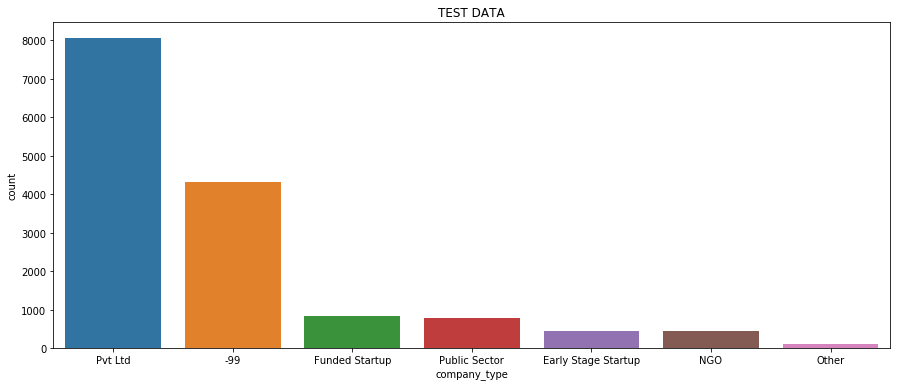

In [81]:
plt.figure(figsize=(15, 6))
sns.countplot(train["company_type"], order = train["company_type"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(test["company_type"], order = test["company_type"].value_counts().index)
plt.title('TEST DATA')
plt.show()

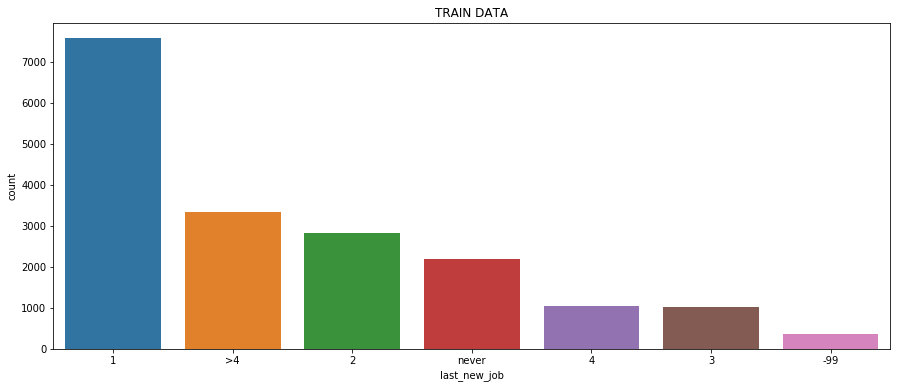

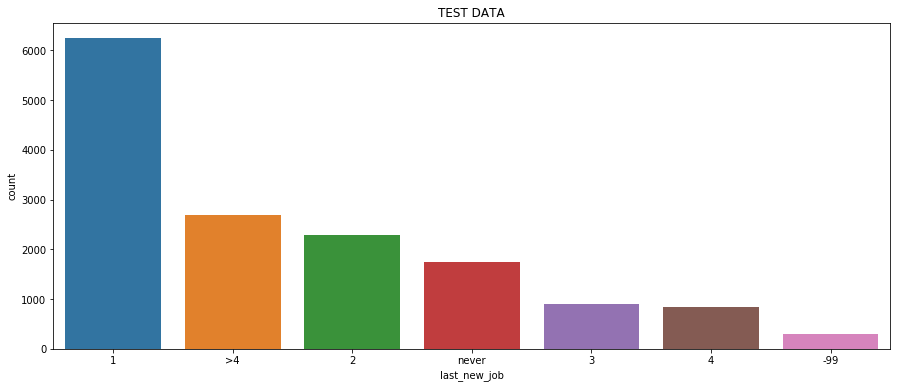

In [82]:
plt.figure(figsize=(15, 6))
sns.countplot(train["last_new_job"], order = train["last_new_job"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 6))
sns.countplot(test["last_new_job"], order = test["last_new_job"].value_counts().index)
plt.title('TEST DATA')
plt.show()

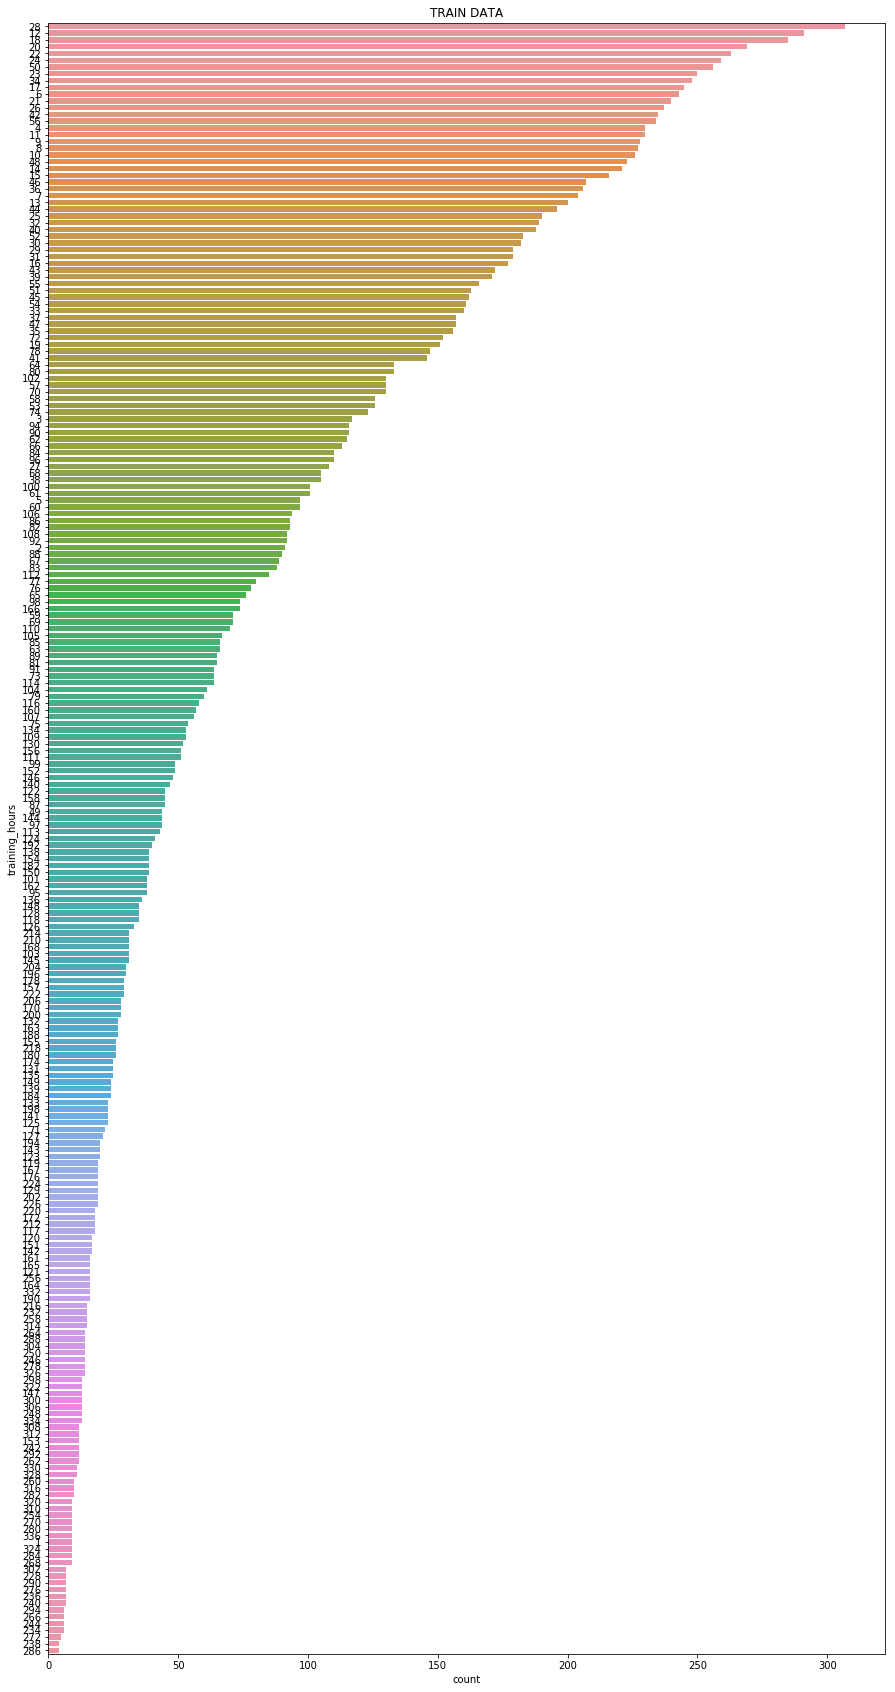

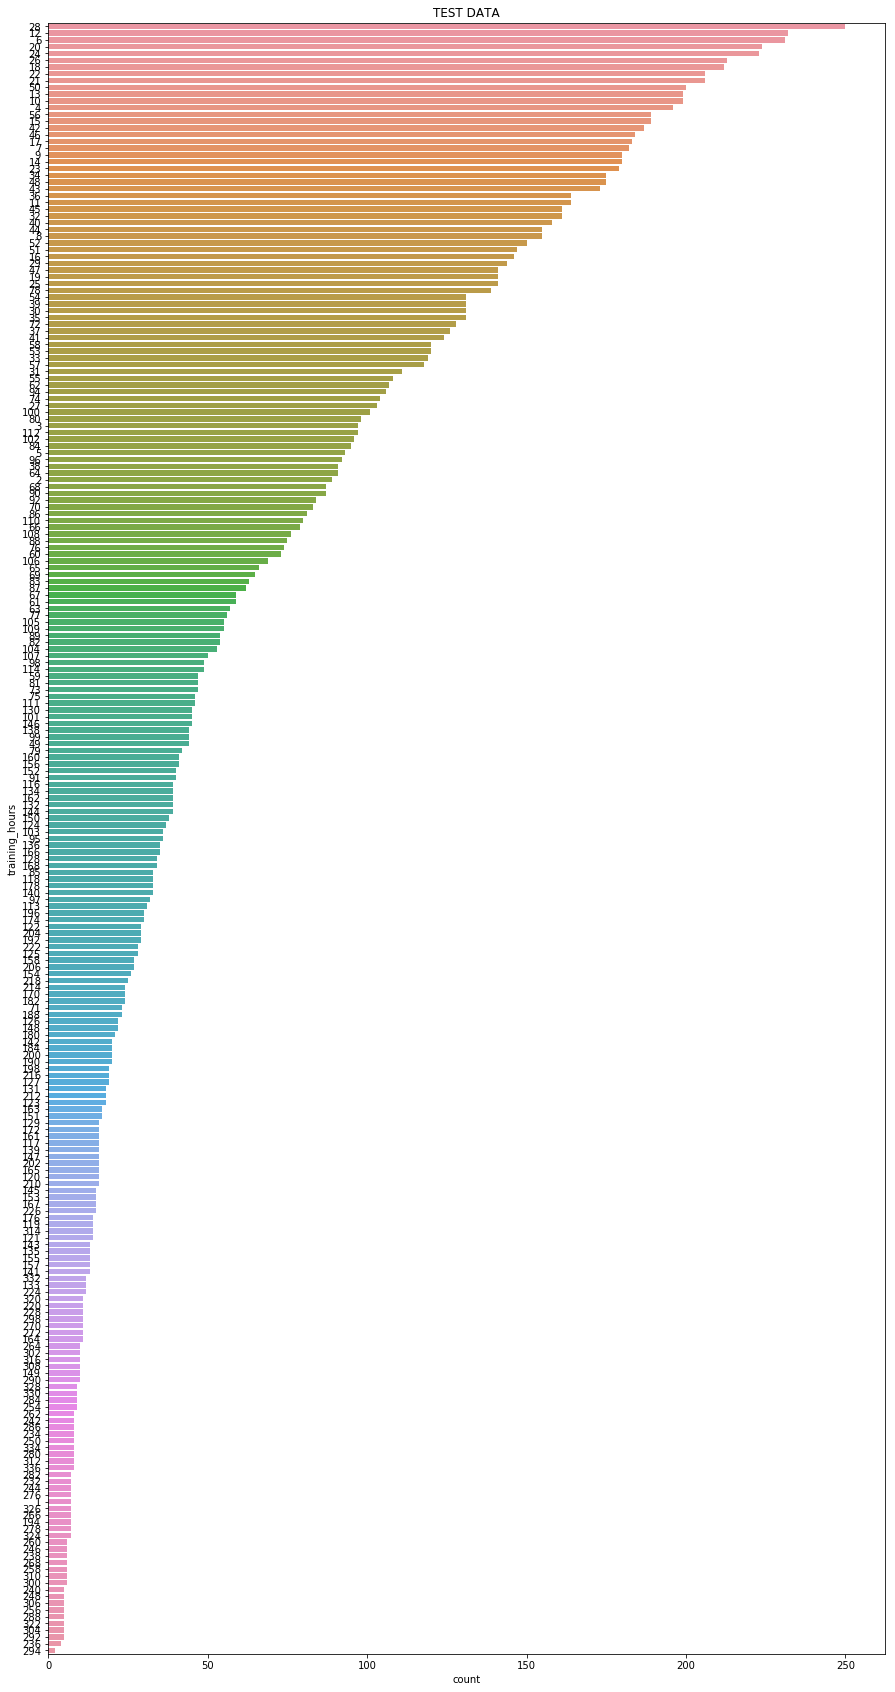

In [83]:
plt.figure(figsize=(15, 30))
sns.countplot(y=train["training_hours"], order = train["training_hours"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()

plt.figure(figsize=(15, 30))
sns.countplot(y=test["training_hours"], order = test["training_hours"].value_counts().index)
plt.title('TEST DATA')
plt.show()

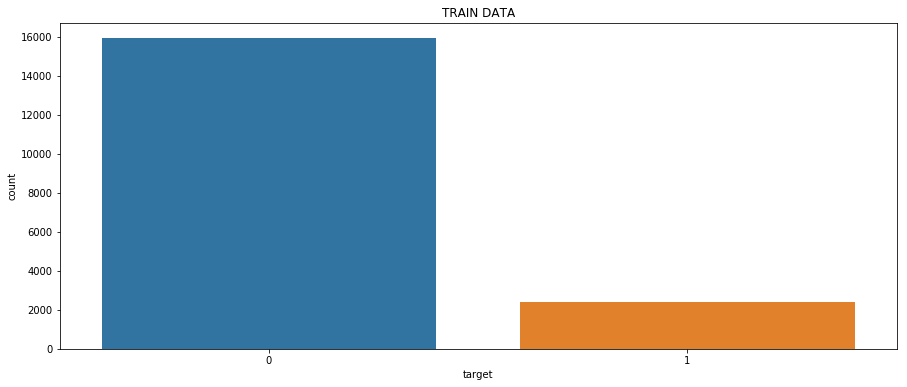

In [84]:
plt.figure(figsize=(15, 6))
sns.countplot(train["target"], order = train["target"].value_counts().index)
plt.title('TRAIN DATA')
plt.show()


# MODEL

In [85]:
#train.loc[train["gender"] == -99,"gender"] = 'Female'

In [22]:
X_Train = train.drop(['target'], axis=1)
y_Train = train['target']
feat_categ = list(np.where(X_Train.dtypes != np.float)[0])

X_Test = test

In [87]:
# Parameters for catboost manually tuned
num_inter = [200, 400, 500, 600, 700, 800, 1000]
Depth = [4, 5, 6, 7, 8, 10]
alpha = [0.001, 0.01, 0.03, 0.1, 0.3]

In [23]:
X_Train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,city_no,company_type_miss,company_size_miss,gender_miss,major_discipline_miss,education_level_miss,last_new_job_miss,enrolled_university_miss,experience_miss
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,...,106,149,0,0,0,0,0,0,0,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,...,69,83,0,0,0,0,0,0,0,0
2,46,city_16,0.910,-99,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,...,4,16,0,0,0,0,0,0,0,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,...,26,64,0,0,0,0,0,0,0,0
4,21751,city_100,0.887,-99,No relevent experience,no_enrollment,Masters,STEM,8,-99,...,88,100,0,0,0,0,0,0,0,0


In [48]:
classifier = cb.CatBoostClassifier(iterations=3000, depth=5, learning_rate=0.04, random_seed=1729,eval_metric='AUC')
classifier.fit(X_Train, y_Train,cat_features=feat_categ,plot=True, )

0:	learn: 0.5579660	total: 87.7ms	remaining: 4m 23s
1:	learn: 0.6045084	total: 171ms	remaining: 4m 15s
2:	learn: 0.6253870	total: 247ms	remaining: 4m 6s
3:	learn: 0.6356198	total: 352ms	remaining: 4m 23s
4:	learn: 0.6405005	total: 412ms	remaining: 4m 7s
5:	learn: 0.6396183	total: 451ms	remaining: 3m 44s
6:	learn: 0.6391267	total: 542ms	remaining: 3m 51s
7:	learn: 0.6376202	total: 625ms	remaining: 3m 53s
8:	learn: 0.6421526	total: 713ms	remaining: 3m 56s
9:	learn: 0.6421526	total: 736ms	remaining: 3m 40s
10:	learn: 0.6418965	total: 796ms	remaining: 3m 36s
11:	learn: 0.6421081	total: 820ms	remaining: 3m 24s
12:	learn: 0.6410680	total: 861ms	remaining: 3m 17s
13:	learn: 0.6410346	total: 898ms	remaining: 3m 11s


MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed_iterations': 13, 'total_iterations': 3000, 'data': {'iterations': [{'learn': [0.5579659523, 0.6652887199], 'iteration': 0, 'passed_time': 0.08772901067, 'remaining_time': 263.099303}, {'learn': [0.6045083909, 0.6397745968], 'iteration': 1, 'passed_time': 0.1707589202, 'remaining_time': 255.9676213}, {'learn': [0.6253869894, 0.6170183743], 'iteration': 2, 'passed_time': 0.2470814315, 'remaining_time': 246.8343501}, {'learn': [0.6356197666, 0.5955815638], 'iteration': 3, 'passed_time': 0.3517258925, 'remaining_time': 263.4426935}, {'learn': [0.6405005441, 0.5760229914], 'iteration': 4, 'passed_time': 0.4124435158, 'remaining_time': 247.053666}, {'learn': [0.6396182837, 0.558583076], 'iteration': 5, 'passed_time': 0.4507849034, 'remaining_time': 224.9416668}, {'learn': [0.6391266552, 0.5430819282], 'iteration': 6, 'passed_time': 0.5421370236, 'remaining_time': 231.8023017}, {'learn': [0.6376201833, 0.5282413242], 'iteration': 7, 'passed_time': 0.6253145382, 'remaining_time': 233.8676373}, {'learn': [0.6421525908, 0.514676756], 'iteration': 8, 'passed_time': 0.7127515779, 'remaining_time': 236.8711077}, {'learn': [0.6421525908, 0.5033774528], 'iteration': 9, 'passed_time': 0.7364410613, 'remaining_time': 220.1958773}, {'learn': [0.6418964698, 0.4924467271], 'iteration': 10, 'passed_time': 0.7964577873, 'remaining_time': 216.4193024}, {'learn': [0.642108129, 0.4831133453], 'iteration': 11, 'passed_time': 0.8204251888, 'remaining_time': 204.285872}, {'learn': [0.6410680397, 0.4741722235], 'iteration': 12, 'passed_time': 0.8606059241, 'remaining_time': 197.7407612}, {'learn': [0.6410346416, 0.4664567511], 'iteration': 13, 'passed_time': 0.8984005817, 'remaining_time': 191.6160098}], 'meta': {'launch_mode': 'Train', 'name': 'experiment', 'iteration_count': 3000, 'learn_metrics': [{'best_value': 'Max', 'name': 'AUC'}, {'best_value': 'Min', 'name': 'Logloss'}], 'test_sets': [], 'test_metrics': [], 'learn_sets': ['learn']}}}}}, layout=Layout(align_self='stretch', height='500px'))

14:	learn: 0.6442427	total: 990ms	remaining: 3m 17s
15:	learn: 0.6464581	total: 1.08s	remaining: 3m 21s
16:	learn: 0.6479373	total: 1.15s	remaining: 3m 21s
17:	learn: 0.6479232	total: 1.23s	remaining: 3m 23s
18:	learn: 0.6487416	total: 1.3s	remaining: 3m 24s
19:	learn: 0.6481857	total: 1.39s	remaining: 3m 26s
20:	learn: 0.6474751	total: 1.46s	remaining: 3m 27s
21:	learn: 0.6490253	total: 1.54s	remaining: 3m 28s
22:	learn: 0.6489738	total: 1.62s	remaining: 3m 29s
23:	learn: 0.6506858	total: 1.72s	remaining: 3m 33s
24:	learn: 0.6506858	total: 1.76s	remaining: 3m 29s
25:	learn: 0.6520907	total: 1.87s	remaining: 3m 33s
26:	learn: 0.6525577	total: 1.94s	remaining: 3m 33s
27:	learn: 0.6526000	total: 1.99s	remaining: 3m 31s
28:	learn: 0.6527120	total: 2.06s	remaining: 3m 31s
29:	learn: 0.6538344	total: 2.16s	remaining: 3m 33s
30:	learn: 0.6549187	total: 2.26s	remaining: 3m 36s
31:	learn: 0.6553391	total: 2.36s	remaining: 3m 39s
32:	learn: 0.6556475	total: 2.51s	remaining: 3m 45s
33:	learn: 0.

173:	learn: 0.6867284	total: 13.8s	remaining: 3m 43s
174:	learn: 0.6868426	total: 13.8s	remaining: 3m 42s
175:	learn: 0.6870878	total: 13.9s	remaining: 3m 42s
176:	learn: 0.6872852	total: 14.1s	remaining: 3m 44s
177:	learn: 0.6872852	total: 14.1s	remaining: 3m 43s
178:	learn: 0.6872575	total: 14.2s	remaining: 3m 43s
179:	learn: 0.6873562	total: 14.3s	remaining: 3m 43s
180:	learn: 0.6874013	total: 14.3s	remaining: 3m 43s
181:	learn: 0.6874947	total: 14.4s	remaining: 3m 42s
182:	learn: 0.6874947	total: 14.4s	remaining: 3m 41s
183:	learn: 0.6874947	total: 14.4s	remaining: 3m 40s
184:	learn: 0.6874947	total: 14.4s	remaining: 3m 39s
185:	learn: 0.6876594	total: 14.5s	remaining: 3m 39s
186:	learn: 0.6877685	total: 14.6s	remaining: 3m 39s
187:	learn: 0.6879850	total: 14.7s	remaining: 3m 39s
188:	learn: 0.6879758	total: 14.8s	remaining: 3m 39s
189:	learn: 0.6880583	total: 14.8s	remaining: 3m 39s
190:	learn: 0.6881255	total: 14.9s	remaining: 3m 39s
191:	learn: 0.6881255	total: 14.9s	remaining: 

330:	learn: 0.7060599	total: 27.5s	remaining: 3m 41s
331:	learn: 0.7064165	total: 27.6s	remaining: 3m 41s
332:	learn: 0.7065672	total: 27.6s	remaining: 3m 41s
333:	learn: 0.7066427	total: 27.7s	remaining: 3m 41s
334:	learn: 0.7069355	total: 27.8s	remaining: 3m 41s
335:	learn: 0.7070994	total: 27.9s	remaining: 3m 41s
336:	learn: 0.7074580	total: 28s	remaining: 3m 41s
337:	learn: 0.7076103	total: 28.1s	remaining: 3m 41s
338:	learn: 0.7078676	total: 28.2s	remaining: 3m 41s
339:	learn: 0.7080219	total: 28.3s	remaining: 3m 41s
340:	learn: 0.7081440	total: 28.4s	remaining: 3m 41s
341:	learn: 0.7082575	total: 28.4s	remaining: 3m 40s
342:	learn: 0.7085235	total: 28.5s	remaining: 3m 40s
343:	learn: 0.7086639	total: 28.6s	remaining: 3m 40s
344:	learn: 0.7088077	total: 28.7s	remaining: 3m 40s
345:	learn: 0.7088760	total: 28.8s	remaining: 3m 40s
346:	learn: 0.7090388	total: 28.9s	remaining: 3m 40s
347:	learn: 0.7090601	total: 28.9s	remaining: 3m 40s
348:	learn: 0.7090933	total: 29s	remaining: 3m 4

488:	learn: 0.7242830	total: 39.2s	remaining: 3m 21s
489:	learn: 0.7243031	total: 39.3s	remaining: 3m 21s
490:	learn: 0.7243567	total: 39.4s	remaining: 3m 21s
491:	learn: 0.7244658	total: 39.4s	remaining: 3m 21s
492:	learn: 0.7245263	total: 39.5s	remaining: 3m 20s
493:	learn: 0.7246245	total: 39.6s	remaining: 3m 20s
494:	learn: 0.7246305	total: 39.6s	remaining: 3m 20s
495:	learn: 0.7246467	total: 39.7s	remaining: 3m 20s
496:	learn: 0.7247331	total: 39.8s	remaining: 3m 20s
497:	learn: 0.7249308	total: 39.8s	remaining: 3m 20s
498:	learn: 0.7250017	total: 39.9s	remaining: 3m 19s
499:	learn: 0.7250889	total: 39.9s	remaining: 3m 19s
500:	learn: 0.7251768	total: 40s	remaining: 3m 19s
501:	learn: 0.7252529	total: 40.1s	remaining: 3m 19s
502:	learn: 0.7253876	total: 40.1s	remaining: 3m 19s
503:	learn: 0.7254059	total: 40.2s	remaining: 3m 19s
504:	learn: 0.7254347	total: 40.3s	remaining: 3m 18s
505:	learn: 0.7254531	total: 40.3s	remaining: 3m 18s
506:	learn: 0.7254782	total: 40.4s	remaining: 3m

647:	learn: 0.7356393	total: 51s	remaining: 3m 4s
648:	learn: 0.7356977	total: 51s	remaining: 3m 4s
649:	learn: 0.7357214	total: 51.1s	remaining: 3m 4s
650:	learn: 0.7357458	total: 51.2s	remaining: 3m 4s
651:	learn: 0.7357916	total: 51.3s	remaining: 3m 4s
652:	learn: 0.7358464	total: 51.4s	remaining: 3m 4s
653:	learn: 0.7359067	total: 51.5s	remaining: 3m 4s
654:	learn: 0.7359387	total: 51.6s	remaining: 3m 4s
655:	learn: 0.7359969	total: 51.7s	remaining: 3m 4s
656:	learn: 0.7361052	total: 51.8s	remaining: 3m 4s
657:	learn: 0.7361484	total: 51.8s	remaining: 3m 4s
658:	learn: 0.7361887	total: 51.9s	remaining: 3m 4s
659:	learn: 0.7362632	total: 52s	remaining: 3m 4s
660:	learn: 0.7363107	total: 52.1s	remaining: 3m 4s
661:	learn: 0.7363983	total: 52.2s	remaining: 3m 4s
662:	learn: 0.7364285	total: 52.3s	remaining: 3m 4s
663:	learn: 0.7365378	total: 52.3s	remaining: 3m 4s
664:	learn: 0.7367573	total: 52.4s	remaining: 3m 4s
665:	learn: 0.7367937	total: 52.5s	remaining: 3m 4s
666:	learn: 0.7368

806:	learn: 0.7456353	total: 1m 3s	remaining: 2m 52s
807:	learn: 0.7457728	total: 1m 3s	remaining: 2m 52s
808:	learn: 0.7458014	total: 1m 3s	remaining: 2m 52s
809:	learn: 0.7458891	total: 1m 3s	remaining: 2m 51s
810:	learn: 0.7459791	total: 1m 3s	remaining: 2m 51s
811:	learn: 0.7459959	total: 1m 3s	remaining: 2m 51s
812:	learn: 0.7461452	total: 1m 3s	remaining: 2m 51s
813:	learn: 0.7461498	total: 1m 3s	remaining: 2m 51s
814:	learn: 0.7461721	total: 1m 3s	remaining: 2m 51s
815:	learn: 0.7461698	total: 1m 4s	remaining: 2m 51s
816:	learn: 0.7461818	total: 1m 4s	remaining: 2m 51s
817:	learn: 0.7462455	total: 1m 4s	remaining: 2m 51s
818:	learn: 0.7463440	total: 1m 4s	remaining: 2m 50s
819:	learn: 0.7463850	total: 1m 4s	remaining: 2m 50s
820:	learn: 0.7464426	total: 1m 4s	remaining: 2m 50s
821:	learn: 0.7464676	total: 1m 4s	remaining: 2m 50s
822:	learn: 0.7464902	total: 1m 4s	remaining: 2m 50s
823:	learn: 0.7464919	total: 1m 4s	remaining: 2m 50s
824:	learn: 0.7465015	total: 1m 4s	remaining: 

962:	learn: 0.7536628	total: 1m 15s	remaining: 2m 38s
963:	learn: 0.7536609	total: 1m 15s	remaining: 2m 38s
964:	learn: 0.7538220	total: 1m 15s	remaining: 2m 38s
965:	learn: 0.7538360	total: 1m 15s	remaining: 2m 38s
966:	learn: 0.7538267	total: 1m 15s	remaining: 2m 38s
967:	learn: 0.7538922	total: 1m 15s	remaining: 2m 38s
968:	learn: 0.7539743	total: 1m 15s	remaining: 2m 38s
969:	learn: 0.7539717	total: 1m 15s	remaining: 2m 38s
970:	learn: 0.7540389	total: 1m 15s	remaining: 2m 38s
971:	learn: 0.7540530	total: 1m 15s	remaining: 2m 38s
972:	learn: 0.7540798	total: 1m 16s	remaining: 2m 38s
973:	learn: 0.7541520	total: 1m 16s	remaining: 2m 38s
974:	learn: 0.7541384	total: 1m 16s	remaining: 2m 38s
975:	learn: 0.7542046	total: 1m 16s	remaining: 2m 38s
976:	learn: 0.7543522	total: 1m 16s	remaining: 2m 38s
977:	learn: 0.7544084	total: 1m 16s	remaining: 2m 38s
978:	learn: 0.7544448	total: 1m 16s	remaining: 2m 38s
979:	learn: 0.7544855	total: 1m 16s	remaining: 2m 38s
980:	learn: 0.7545169	total:

1112:	learn: 0.7614770	total: 1m 29s	remaining: 2m 31s
1113:	learn: 0.7615180	total: 1m 29s	remaining: 2m 31s
1114:	learn: 0.7615252	total: 1m 29s	remaining: 2m 31s
1115:	learn: 0.7616014	total: 1m 29s	remaining: 2m 31s
1116:	learn: 0.7616482	total: 1m 29s	remaining: 2m 31s
1117:	learn: 0.7617395	total: 1m 29s	remaining: 2m 31s
1118:	learn: 0.7617580	total: 1m 30s	remaining: 2m 31s
1119:	learn: 0.7617298	total: 1m 30s	remaining: 2m 31s
1120:	learn: 0.7617792	total: 1m 30s	remaining: 2m 31s
1121:	learn: 0.7617904	total: 1m 30s	remaining: 2m 31s
1122:	learn: 0.7618662	total: 1m 30s	remaining: 2m 31s
1123:	learn: 0.7618487	total: 1m 30s	remaining: 2m 30s
1124:	learn: 0.7618289	total: 1m 30s	remaining: 2m 30s
1125:	learn: 0.7618740	total: 1m 30s	remaining: 2m 30s
1126:	learn: 0.7619903	total: 1m 30s	remaining: 2m 30s
1127:	learn: 0.7621131	total: 1m 30s	remaining: 2m 30s
1128:	learn: 0.7620939	total: 1m 30s	remaining: 2m 30s
1129:	learn: 0.7621057	total: 1m 31s	remaining: 2m 30s
1130:	lear

1262:	learn: 0.7697819	total: 1m 43s	remaining: 2m 22s
1263:	learn: 0.7697754	total: 1m 43s	remaining: 2m 22s
1264:	learn: 0.7698373	total: 1m 43s	remaining: 2m 22s
1265:	learn: 0.7698307	total: 1m 43s	remaining: 2m 22s
1266:	learn: 0.7698306	total: 1m 43s	remaining: 2m 22s
1267:	learn: 0.7698301	total: 1m 43s	remaining: 2m 21s
1268:	learn: 0.7698148	total: 1m 44s	remaining: 2m 21s
1269:	learn: 0.7698076	total: 1m 44s	remaining: 2m 21s
1270:	learn: 0.7698038	total: 1m 44s	remaining: 2m 21s
1271:	learn: 0.7698952	total: 1m 44s	remaining: 2m 21s
1272:	learn: 0.7699250	total: 1m 44s	remaining: 2m 21s
1273:	learn: 0.7699250	total: 1m 44s	remaining: 2m 21s
1274:	learn: 0.7699182	total: 1m 44s	remaining: 2m 21s
1275:	learn: 0.7699451	total: 1m 44s	remaining: 2m 21s
1276:	learn: 0.7699330	total: 1m 44s	remaining: 2m 21s
1277:	learn: 0.7700715	total: 1m 45s	remaining: 2m 21s
1278:	learn: 0.7700639	total: 1m 45s	remaining: 2m 21s
1279:	learn: 0.7701742	total: 1m 45s	remaining: 2m 21s
1280:	lear

1411:	learn: 0.7765192	total: 1m 57s	remaining: 2m 11s
1412:	learn: 0.7765462	total: 1m 57s	remaining: 2m 11s
1413:	learn: 0.7766281	total: 1m 57s	remaining: 2m 11s
1414:	learn: 0.7767739	total: 1m 57s	remaining: 2m 11s
1415:	learn: 0.7768414	total: 1m 57s	remaining: 2m 11s
1416:	learn: 0.7769286	total: 1m 57s	remaining: 2m 11s
1417:	learn: 0.7769516	total: 1m 57s	remaining: 2m 11s
1418:	learn: 0.7769417	total: 1m 57s	remaining: 2m 11s
1419:	learn: 0.7769650	total: 1m 57s	remaining: 2m 11s
1420:	learn: 0.7769657	total: 1m 57s	remaining: 2m 11s
1421:	learn: 0.7771311	total: 1m 57s	remaining: 2m 10s
1422:	learn: 0.7771260	total: 1m 58s	remaining: 2m 10s
1423:	learn: 0.7771019	total: 1m 58s	remaining: 2m 10s
1424:	learn: 0.7772240	total: 1m 58s	remaining: 2m 10s
1425:	learn: 0.7773615	total: 1m 58s	remaining: 2m 10s
1426:	learn: 0.7774140	total: 1m 58s	remaining: 2m 10s
1427:	learn: 0.7774406	total: 1m 58s	remaining: 2m 10s
1428:	learn: 0.7774340	total: 1m 58s	remaining: 2m 10s
1429:	lear

1568:	learn: 0.7820761	total: 2m 8s	remaining: 1m 57s
1569:	learn: 0.7820763	total: 2m 8s	remaining: 1m 57s
1570:	learn: 0.7821161	total: 2m 8s	remaining: 1m 57s
1571:	learn: 0.7821807	total: 2m 9s	remaining: 1m 57s
1572:	learn: 0.7822611	total: 2m 9s	remaining: 1m 57s
1573:	learn: 0.7822639	total: 2m 9s	remaining: 1m 57s
1574:	learn: 0.7824772	total: 2m 9s	remaining: 1m 56s
1575:	learn: 0.7825144	total: 2m 9s	remaining: 1m 56s
1576:	learn: 0.7825161	total: 2m 9s	remaining: 1m 56s
1577:	learn: 0.7825177	total: 2m 9s	remaining: 1m 56s
1578:	learn: 0.7826362	total: 2m 9s	remaining: 1m 56s
1579:	learn: 0.7826331	total: 2m 9s	remaining: 1m 56s
1580:	learn: 0.7826658	total: 2m 9s	remaining: 1m 56s
1581:	learn: 0.7826765	total: 2m 9s	remaining: 1m 56s
1582:	learn: 0.7826769	total: 2m 9s	remaining: 1m 56s
1583:	learn: 0.7827086	total: 2m 10s	remaining: 1m 56s
1584:	learn: 0.7828366	total: 2m 10s	remaining: 1m 56s
1585:	learn: 0.7828373	total: 2m 10s	remaining: 1m 56s
1586:	learn: 0.7829774	to

1719:	learn: 0.7874703	total: 2m 20s	remaining: 1m 44s
1720:	learn: 0.7875599	total: 2m 20s	remaining: 1m 44s
1721:	learn: 0.7876544	total: 2m 20s	remaining: 1m 44s
1722:	learn: 0.7876628	total: 2m 21s	remaining: 1m 44s
1723:	learn: 0.7876689	total: 2m 21s	remaining: 1m 44s
1724:	learn: 0.7877008	total: 2m 21s	remaining: 1m 44s
1725:	learn: 0.7877020	total: 2m 21s	remaining: 1m 44s
1726:	learn: 0.7876947	total: 2m 21s	remaining: 1m 44s
1727:	learn: 0.7877512	total: 2m 21s	remaining: 1m 44s
1728:	learn: 0.7878139	total: 2m 21s	remaining: 1m 43s
1729:	learn: 0.7879326	total: 2m 21s	remaining: 1m 43s
1730:	learn: 0.7879275	total: 2m 21s	remaining: 1m 43s
1731:	learn: 0.7879546	total: 2m 21s	remaining: 1m 43s
1732:	learn: 0.7880055	total: 2m 21s	remaining: 1m 43s
1733:	learn: 0.7880710	total: 2m 21s	remaining: 1m 43s
1734:	learn: 0.7882229	total: 2m 21s	remaining: 1m 43s
1735:	learn: 0.7882832	total: 2m 21s	remaining: 1m 43s
1736:	learn: 0.7883016	total: 2m 21s	remaining: 1m 43s
1737:	lear

1868:	learn: 0.7935771	total: 2m 31s	remaining: 1m 31s
1869:	learn: 0.7935722	total: 2m 31s	remaining: 1m 31s
1870:	learn: 0.7935704	total: 2m 31s	remaining: 1m 31s
1871:	learn: 0.7936160	total: 2m 31s	remaining: 1m 31s
1872:	learn: 0.7936103	total: 2m 32s	remaining: 1m 31s
1873:	learn: 0.7936402	total: 2m 32s	remaining: 1m 31s
1874:	learn: 0.7936415	total: 2m 32s	remaining: 1m 31s
1875:	learn: 0.7937044	total: 2m 32s	remaining: 1m 31s
1876:	learn: 0.7937428	total: 2m 32s	remaining: 1m 31s
1877:	learn: 0.7939853	total: 2m 32s	remaining: 1m 31s
1878:	learn: 0.7940682	total: 2m 32s	remaining: 1m 30s
1879:	learn: 0.7940631	total: 2m 32s	remaining: 1m 30s
1880:	learn: 0.7941641	total: 2m 32s	remaining: 1m 30s
1881:	learn: 0.7942017	total: 2m 32s	remaining: 1m 30s
1882:	learn: 0.7943014	total: 2m 32s	remaining: 1m 30s
1883:	learn: 0.7942965	total: 2m 32s	remaining: 1m 30s
1884:	learn: 0.7943011	total: 2m 32s	remaining: 1m 30s
1885:	learn: 0.7943860	total: 2m 32s	remaining: 1m 30s
1886:	lear

2018:	learn: 0.7990529	total: 2m 44s	remaining: 1m 19s
2019:	learn: 0.7991345	total: 2m 44s	remaining: 1m 19s
2020:	learn: 0.7991848	total: 2m 44s	remaining: 1m 19s
2021:	learn: 0.7991752	total: 2m 44s	remaining: 1m 19s
2022:	learn: 0.7992413	total: 2m 44s	remaining: 1m 19s
2023:	learn: 0.7992395	total: 2m 44s	remaining: 1m 19s
2024:	learn: 0.7993593	total: 2m 45s	remaining: 1m 19s
2025:	learn: 0.7993435	total: 2m 45s	remaining: 1m 19s
2026:	learn: 0.7994133	total: 2m 45s	remaining: 1m 19s
2027:	learn: 0.7994456	total: 2m 45s	remaining: 1m 19s
2028:	learn: 0.7995723	total: 2m 45s	remaining: 1m 19s
2029:	learn: 0.7995856	total: 2m 45s	remaining: 1m 19s
2030:	learn: 0.7995841	total: 2m 45s	remaining: 1m 18s
2031:	learn: 0.7996442	total: 2m 45s	remaining: 1m 18s
2032:	learn: 0.7996372	total: 2m 45s	remaining: 1m 18s
2033:	learn: 0.7996359	total: 2m 45s	remaining: 1m 18s
2034:	learn: 0.7996492	total: 2m 45s	remaining: 1m 18s
2035:	learn: 0.7997328	total: 2m 45s	remaining: 1m 18s
2036:	lear

2168:	learn: 0.8025892	total: 2m 58s	remaining: 1m 8s
2169:	learn: 0.8025918	total: 2m 58s	remaining: 1m 8s
2170:	learn: 0.8025938	total: 2m 58s	remaining: 1m 8s
2171:	learn: 0.8026447	total: 2m 58s	remaining: 1m 8s
2172:	learn: 0.8026463	total: 2m 58s	remaining: 1m 8s
2173:	learn: 0.8027253	total: 2m 59s	remaining: 1m 8s
2174:	learn: 0.8027610	total: 2m 59s	remaining: 1m 7s
2175:	learn: 0.8027525	total: 2m 59s	remaining: 1m 7s
2176:	learn: 0.8027584	total: 2m 59s	remaining: 1m 7s
2177:	learn: 0.8027632	total: 2m 59s	remaining: 1m 7s
2178:	learn: 0.8028042	total: 2m 59s	remaining: 1m 7s
2179:	learn: 0.8028442	total: 2m 59s	remaining: 1m 7s
2180:	learn: 0.8029423	total: 2m 59s	remaining: 1m 7s
2181:	learn: 0.8029393	total: 2m 59s	remaining: 1m 7s
2182:	learn: 0.8029408	total: 2m 59s	remaining: 1m 7s
2183:	learn: 0.8030735	total: 2m 59s	remaining: 1m 7s
2184:	learn: 0.8031691	total: 2m 59s	remaining: 1m 7s
2185:	learn: 0.8033160	total: 3m	remaining: 1m 7s
2186:	learn: 0.8033967	total: 3m

2325:	learn: 0.8079222	total: 3m 13s	remaining: 56.1s
2326:	learn: 0.8079427	total: 3m 13s	remaining: 56.1s
2327:	learn: 0.8079428	total: 3m 13s	remaining: 56s
2328:	learn: 0.8079426	total: 3m 13s	remaining: 55.9s
2329:	learn: 0.8079410	total: 3m 14s	remaining: 55.8s
2330:	learn: 0.8079665	total: 3m 14s	remaining: 55.7s
2331:	learn: 0.8079687	total: 3m 14s	remaining: 55.6s
2332:	learn: 0.8080803	total: 3m 14s	remaining: 55.5s
2333:	learn: 0.8081794	total: 3m 14s	remaining: 55.4s
2334:	learn: 0.8081786	total: 3m 14s	remaining: 55.3s
2335:	learn: 0.8081819	total: 3m 14s	remaining: 55.2s
2336:	learn: 0.8082066	total: 3m 14s	remaining: 55.2s
2337:	learn: 0.8082057	total: 3m 14s	remaining: 55.1s
2338:	learn: 0.8082015	total: 3m 14s	remaining: 55s
2339:	learn: 0.8082708	total: 3m 14s	remaining: 54.9s
2340:	learn: 0.8082818	total: 3m 14s	remaining: 54.8s
2341:	learn: 0.8083288	total: 3m 14s	remaining: 54.7s
2342:	learn: 0.8083286	total: 3m 14s	remaining: 54.6s
2343:	learn: 0.8083589	total: 3m

2480:	learn: 0.8120421	total: 3m 25s	remaining: 42.9s
2481:	learn: 0.8120451	total: 3m 25s	remaining: 42.8s
2482:	learn: 0.8120528	total: 3m 25s	remaining: 42.8s
2483:	learn: 0.8120723	total: 3m 25s	remaining: 42.7s
2484:	learn: 0.8121515	total: 3m 25s	remaining: 42.6s
2485:	learn: 0.8121495	total: 3m 25s	remaining: 42.5s
2486:	learn: 0.8121492	total: 3m 25s	remaining: 42.4s
2487:	learn: 0.8121461	total: 3m 25s	remaining: 42.3s
2488:	learn: 0.8121449	total: 3m 25s	remaining: 42.2s
2489:	learn: 0.8121446	total: 3m 25s	remaining: 42.2s
2490:	learn: 0.8121438	total: 3m 25s	remaining: 42.1s
2491:	learn: 0.8122215	total: 3m 26s	remaining: 42s
2492:	learn: 0.8122048	total: 3m 26s	remaining: 41.9s
2493:	learn: 0.8122059	total: 3m 26s	remaining: 41.8s
2494:	learn: 0.8122364	total: 3m 26s	remaining: 41.8s
2495:	learn: 0.8122720	total: 3m 26s	remaining: 41.7s
2496:	learn: 0.8122752	total: 3m 26s	remaining: 41.6s
2497:	learn: 0.8123206	total: 3m 26s	remaining: 41.5s
2498:	learn: 0.8123165	total: 

2635:	learn: 0.8154155	total: 3m 37s	remaining: 30.1s
2636:	learn: 0.8154153	total: 3m 37s	remaining: 30s
2637:	learn: 0.8154144	total: 3m 37s	remaining: 29.9s
2638:	learn: 0.8154141	total: 3m 37s	remaining: 29.8s
2639:	learn: 0.8154398	total: 3m 37s	remaining: 29.7s
2640:	learn: 0.8154396	total: 3m 38s	remaining: 29.6s
2641:	learn: 0.8154455	total: 3m 38s	remaining: 29.6s
2642:	learn: 0.8154556	total: 3m 38s	remaining: 29.5s
2643:	learn: 0.8154551	total: 3m 38s	remaining: 29.4s
2644:	learn: 0.8154566	total: 3m 38s	remaining: 29.3s
2645:	learn: 0.8154770	total: 3m 38s	remaining: 29.2s
2646:	learn: 0.8155087	total: 3m 38s	remaining: 29.1s
2647:	learn: 0.8155947	total: 3m 38s	remaining: 29.1s
2648:	learn: 0.8155948	total: 3m 38s	remaining: 29s
2649:	learn: 0.8155831	total: 3m 38s	remaining: 28.9s
2650:	learn: 0.8155842	total: 3m 38s	remaining: 28.8s
2651:	learn: 0.8156562	total: 3m 39s	remaining: 28.7s
2652:	learn: 0.8157260	total: 3m 39s	remaining: 28.7s
2653:	learn: 0.8157296	total: 3m

2789:	learn: 0.8187696	total: 3m 51s	remaining: 17.4s
2790:	learn: 0.8188407	total: 3m 51s	remaining: 17.3s
2791:	learn: 0.8188579	total: 3m 51s	remaining: 17.2s
2792:	learn: 0.8188581	total: 3m 51s	remaining: 17.2s
2793:	learn: 0.8188551	total: 3m 51s	remaining: 17.1s
2794:	learn: 0.8189805	total: 3m 51s	remaining: 17s
2795:	learn: 0.8189851	total: 3m 52s	remaining: 16.9s
2796:	learn: 0.8189894	total: 3m 52s	remaining: 16.8s
2797:	learn: 0.8189823	total: 3m 52s	remaining: 16.8s
2798:	learn: 0.8189897	total: 3m 52s	remaining: 16.7s
2799:	learn: 0.8190388	total: 3m 52s	remaining: 16.6s
2800:	learn: 0.8190648	total: 3m 52s	remaining: 16.5s
2801:	learn: 0.8191114	total: 3m 52s	remaining: 16.4s
2802:	learn: 0.8191093	total: 3m 52s	remaining: 16.3s
2803:	learn: 0.8191106	total: 3m 52s	remaining: 16.3s
2804:	learn: 0.8191298	total: 3m 52s	remaining: 16.2s
2805:	learn: 0.8191480	total: 3m 52s	remaining: 16.1s
2806:	learn: 0.8191503	total: 3m 52s	remaining: 16s
2807:	learn: 0.8191499	total: 3m

2944:	learn: 0.8220565	total: 4m 3s	remaining: 4.54s
2945:	learn: 0.8220578	total: 4m 3s	remaining: 4.46s
2946:	learn: 0.8220527	total: 4m 3s	remaining: 4.38s
2947:	learn: 0.8220525	total: 4m 3s	remaining: 4.3s
2948:	learn: 0.8220556	total: 4m 3s	remaining: 4.21s
2949:	learn: 0.8220579	total: 4m 3s	remaining: 4.13s
2950:	learn: 0.8220602	total: 4m 3s	remaining: 4.05s
2951:	learn: 0.8220578	total: 4m 3s	remaining: 3.97s
2952:	learn: 0.8220574	total: 4m 4s	remaining: 3.88s
2953:	learn: 0.8220895	total: 4m 4s	remaining: 3.8s
2954:	learn: 0.8220900	total: 4m 4s	remaining: 3.72s
2955:	learn: 0.8220893	total: 4m 4s	remaining: 3.63s
2956:	learn: 0.8220921	total: 4m 4s	remaining: 3.55s
2957:	learn: 0.8220875	total: 4m 4s	remaining: 3.47s
2958:	learn: 0.8221136	total: 4m 4s	remaining: 3.39s
2959:	learn: 0.8221196	total: 4m 4s	remaining: 3.31s
2960:	learn: 0.8221247	total: 4m 4s	remaining: 3.22s
2961:	learn: 0.8221583	total: 4m 4s	remaining: 3.14s
2962:	learn: 0.8221821	total: 4m 4s	remaining: 3

In [49]:
X_Train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'city_no', 'company_type_miss',
       'company_size_miss', 'gender_miss', 'major_discipline_miss',
       'education_level_miss', 'last_new_job_miss', 'enrolled_university_miss',
       'experience_miss'],
      dtype='object')

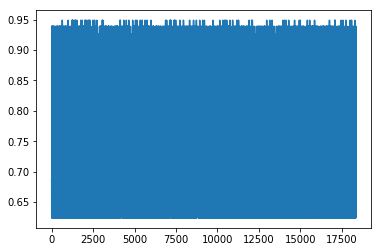

In [50]:
plt.plot(X_Train.city_development_index)

In [51]:
classifier.feature_importances_

[0.0,
 11.853238399883402,
 9.745927507978818,
 6.368307305794955,
 3.235522620506629,
 5.490338866628696,
 5.573888405946594,
 4.722898099541793,
 8.648322416833496,
 11.877880445903669,
 5.494254531015291,
 7.9829148679626165,
 14.724300562698279,
 4.282205969305777,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [56]:
y_Te = classifier.predict_proba(X_Test.values)[:,1]

In [29]:
sub = pd.DataFrame({'enrollee_id': TestData["enrollee_id"], 'target': y_Te})
filename = 'Sub.csv'
sub.to_csv(filename, index=False)

In [270]:
# 68.46 no all new feat with orem with median() 1.6 cb.CatBoostClassifier(iterations=1003, depth=5, learning_rate=0.04, random_seed=1729)